## **Análise Exploratória de Dados (EDA) para elaboração de modelo de previsão de preços.**

---
### **Introdução**
---

A análise exploratória de dados, ou EDA, é uma etapa muito importante no processo de ciência de dados, principalmente em projetos de modelos de previsão. 

Antes de elaborar qualquer análise ou modelo precisamos estudar o dataset, identificar sua estrutura, padrões e incosistências e, com base nisso, gerar objetivos e perguntas que serão relevantes para a identificação e tradução de insights. Essas perguntas são resolvidas ao longo do desenvolvimento do trabalho.

Em plataformas de aluguel, entender as características dos dados e seus fatores, permite que estratégias de precificação sejam otimizadas, maximizando o desempenho da empresa. Fatores como localização, tipo de acomodação, avaliações, e disponibilidade podem ter grande impacto no preço das propriedades.

---
### **Fonte de dados**
---
Os dados foram obtidos através da participação no processo seletivo Lighthouse.

O dataset contém informações sobre anúncios de hospedagem, incluindo detalhes de identificação, localização, tipo de espaço, preço, avaliações, disponibilidade e dados sobre o anfitrião.

Ele é composto de 16 colunas e 48894 linhas. Suas colunas são:

- id – Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo
- nome - Representa o nome do anúncio
- host_id - Representa o id do usuário que hospedou o anúncio
- host_name – Contém o nome do usuário que hospedou o anúncio
- bairro_group - Contém o nome do bairro onde o anúncio está localizado
- bairro - Contém o nome da área onde o anúncio está localizado
- latitude - Contém a latitude do local
- longitude - Contém a longitude do local
- room_type – Contém o tipo de espaço de cada anúncio
- price - Contém o preço por noite em dólares listado pelo anfitrião
- minimo_noites - Contém o número mínimo de noites que o usuário deve reservar
- numero_de_reviews - Contém o número de comentários dados a cada listagem
- ultima_review - Contém a data da última revisão dada à listagem
- reviews_por_mes - Contém o número de avaliações fornecidas por mês
- calculado_host_listings_count - Contém a quantidade de listagem por host
- disponibilidade_365 - Contém o número de dias em que o anúncio está disponível para reserva

---
### **Objetivos**
---
- Compreender a distribuição dos dados analisando variáveis numéricas e categóricas.

- Determinar medidas estatísticas dos dados.

- Explorar as relações entre as variáveis. 

- Responder perguntas como:
    * Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?
    * O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?
    * Existe algum padrão no texto do nome do local para lugares de mais alto valor?
    * Imóveis com mais reviews têm preços mais altos?
    * Imóveis com alta disponibilidade têm preços mais baixos?
    * Imóveis com minimo_noites mais altos têm preços mais altos?


---
### 1 - **Análise**
---
#### 1.1 - **Importação de bibliotecas**
---
Foi feita a importação das bibliotecas necessárias para análise e preparação do DataFrame. O arquivo CSV foi transformado em DF utilizando Pandas.

In [2]:
# Importam as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from scipy.stats import kruskal
from scipy.stats import levene

# Configura o estilo dos gráficos
plt.style.use('ggplot')

# Define o caminho dos dados e transforma em dataframe
data_path = "../data/teste_indicium_precificacao.csv"
df = pd.read_csv(data_path)

---
#### **1.2 - Compreendendo o DataFrame**
Aqui, foram visualizadas as primeiras entradas do DataFrame e o volume de dados para ter um panorama da sua estrutura.

Em seguida, foram visualizados os tipos das variáveis, etapa importante para o restante da análise. Os dados precisam estar coerentes e representando corretamente cada variável.

---
##### **1.2.1 - Primeiras entradas**

In [3]:
# Visualiza as cinco primeiras entradas do DF
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


---
##### **1.2.2 - Volume de dados**

In [4]:
# Visualiza o volume de dados
print(f'Total de colunas = {df.shape[1]}')
print(f'Total de linhas = {df.shape[0]}')

Total de colunas = 16
Total de linhas = 48894


---
##### **1.2.3 - Tipos das variáveis**

In [5]:
# Verifica os tipos das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

---
##### 1.2.4 - **Valores ausentes e duplicatas**

A verificação de valores ausentes é importante para garantir a qualidade da análise, evitando distorções e auxiliando na compreensão dos dados. 

In [6]:
# Verifica os valores ausentes
possui_ausente = (df.isnull().sum() / df.shape[0]) * 100
possui_ausente = possui_ausente[possui_ausente > 0].sort_values(ascending=False)

print(possui_ausente)

reviews_por_mes    20.558760
ultima_review      20.558760
host_name           0.042950
nome                0.032724
dtype: float64


Algumas variáveis apresentam valores ausentes.
- As colunas reviews_por_mes e ultima_review apresentam 20,56% de valores ausentes.
- A coluna host_name apresenta 0,04% de valores ausentes
- A coluna nome apresenta 0,03% dos valores ausentes

As colunas host_name e nome têm uma quantidade muito pequena de valores ausentes o que provavelmente não afetará significativamente a análise.

As colunas reviews_por_mes e ultima_review têm uma quantidade considerável de valores ausentes. Isso pode acontecer porque alguns anúncios nunca receberam avaliações, então não há dados sobre avaliações por mês ou data da última avaliação.

In [7]:
# Verifica se há duplicatas
if df.duplicated().any():
    print("Há duplicatas no conjunto de dados.")
else:
    print("Não há duplicatas no conjunto de dados.")

Não há duplicatas no conjunto de dados.


Não existem dados duplicados no dataframe

---

##### **1.2.5 - Contado os valores únicos da variável alvo**

In [8]:

#Valores únicos para coluna Target
df['price'].nunique()

674

Existem 674 valores únicos para a variável price

---

#### **1.3 - Distribuição das variáveis numéricas**

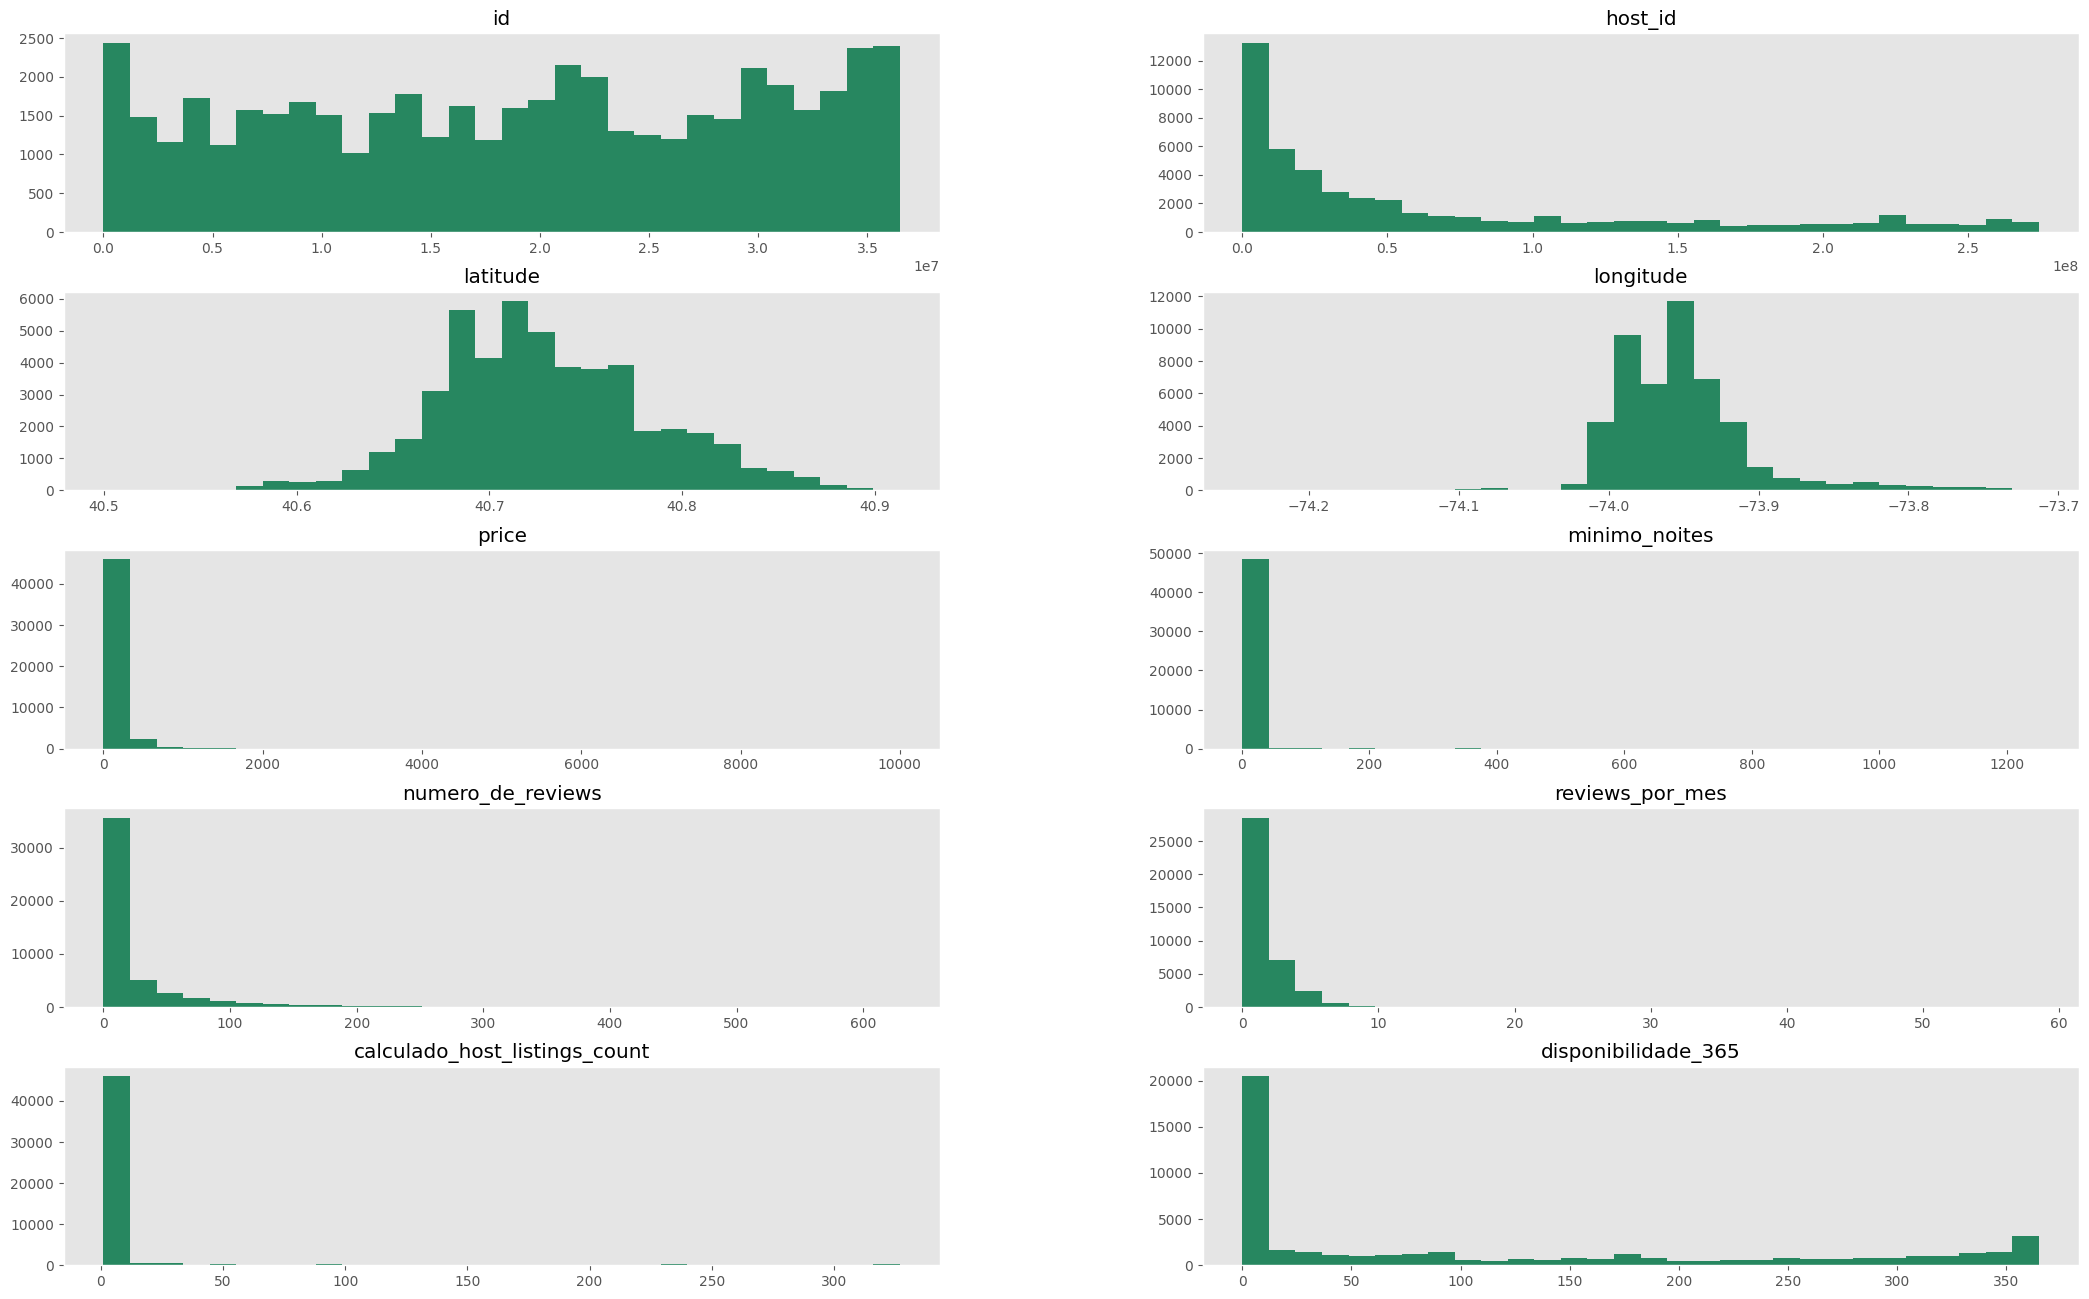

In [9]:
# Plota histogramas de distribuição das variáveis numéricas
df.hist(bins=30, figsize=(26, 16), grid=False, color="#278760", layout=(5, 2));

---
#### **1.4 - Detecção de Outliers**

Verificar outliers é essencial para identificação de valores extremos que podem distorcer as análises. Isso auxilia na detecção de erros de dados ou padrões excepcionais que merecem atenção. Aqui optei pela utilização da visualização das estatísticas com describe e plotagem boxplot para observar os outliers.

In [10]:
# Exibe o resumo estatístico das variáveis numéricas escolhidas
df[['price', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 'calculado_host_listings_count', 'disponibilidade_365']].describe()

,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Observando o resumo estatístico, podemos ver a presença de outliers nas três variáveis. Isso pode ser visualizado ao serem encontradas médias maiores que o terceiro quartil. 

Além disso:

- **price:**
    - Tem como média do preço é 152,72, mas o seu desvio padrão é alto (240,15), indicando uma grande dispersão nos valores.
    - Tem como preço mínimo "0" indicando erros de preenchimento ou gratuidade.
    - Tem como preço máximo 10.000 que é provavelmente um outlier.
    - A mediana (106) é menor que a média, o que sugere uma distribuição assimétrica à direita (com cauda longa para valores altos).

- **minimo_noites:**
    - Tem como média 7,03, mas o desvio padrão é alto (20,51), indicando grande variabilidade.
    - Tem como valor máximo 1.250 noites, o que parece ser um outlier.
    - A mediana é 3, o que significa que 50% dos anúncios exigem 3 noites ou menos.
    - A distribuição é assimétrica à direita, com a maioria dos anúncios tendo poucas avaliações.

- **numero_de_reviews**
    - Tem como média 23,27, mas o desvio padrão é alto (44,55), indicando grande dispersão.
    - O valor máximo é de 629 avaliações, o que não necessariamente é um outlier.
    - A mediana é 5, o que significa que 50% dos anúncios têm 5 avaliações ou menos.
    - A distribuição é assimétrica à direita, com a maioria dos anúncios tendo poucas avaliações.

- **reviews_por_mes**
    - Tem como média 1,37, e seu desvio padrão é moderado (1.68) indicando uma leve dispersão em torno da média.
    - Seu valor máximo é de 58.5 o que pode sugerir presença de outliers.
    - 75% dos valores estão abaixo de 2.02

- **calculado_host_listings_count**
    - Tem como média 7,14, mas o desvio padrão é muito alto (32,96), indicando grande dispersão.
    - O valor máximo é 327 anúncios por anfitrião, o que parece ser um outlier.
    - A mediana é 1, o que significa que 50% dos anfitriões têm apenas 1 anúncio.
    - A distribuição é assimétrica à direita, com a maioria dos anfitriões tendo poucos anúncios.

- **disponibilidade_365**
    - Tem como média 112,79 dias, mas o desvio padrão é alto (131,60), indicando grande variabilidade.
    - A mediana é 45 dias, o que significa que 50% dos anúncios estão disponíveis por 45 dias ou menos.
    - O valor máximo é 365 dias, indicando que alguns anúncios estão disponíveis o ano todo.
    - A distribuição é assimétrica à esquerda, com muitos anúncios tendo baixa disponibilidade.


**Obsevações gerais:**
- 5 das 6 variáveis apresentam outliers
- A maioria das variáveis tem distribuição assimétrica à direita, tendo a maioria dos valores concentrados em números baixos.
- O alto desvio padrão em várias colunas indica grande variabilidade nos dados.
- A presença de preços iguais a 0 e disponibilidade 0 pode indicar erros ou anúncios inativos.



---
##### **1.4.1 - Boxplot para as variáveis numéricas**

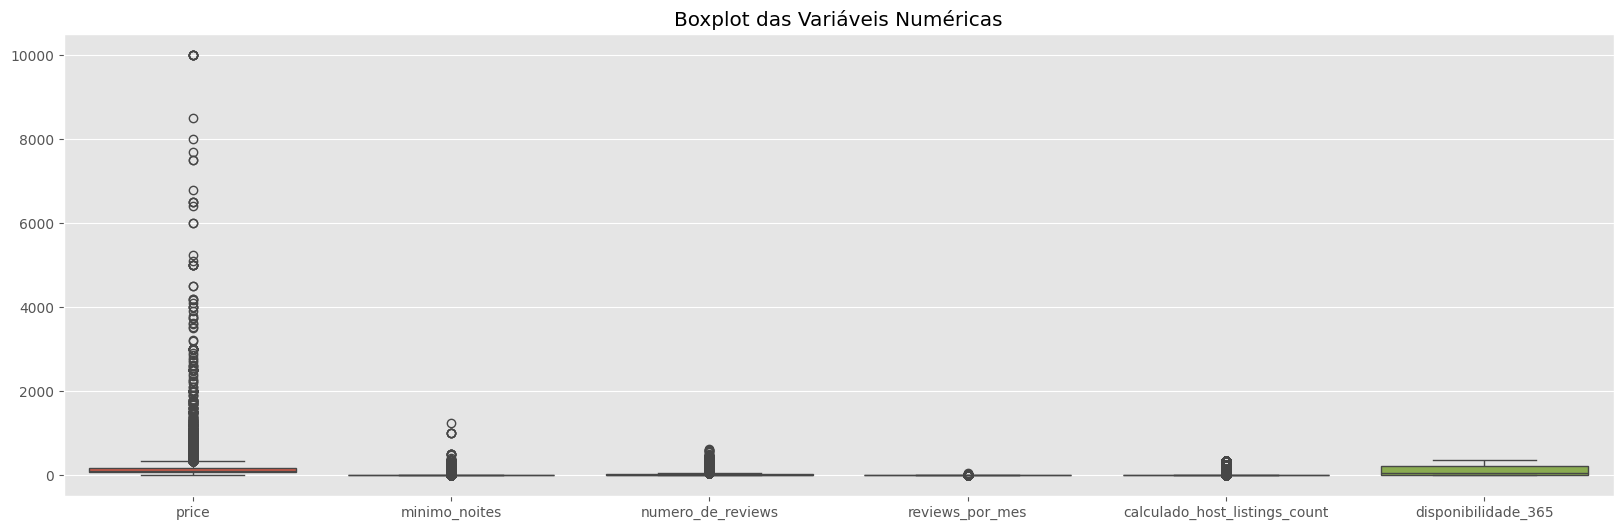

In [11]:
# Plota o Boxplot das variáveis numéricas
plt.figure(figsize=(20, 6))
sns.boxplot(data=df[['price', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 'calculado_host_listings_count', 'disponibilidade_365']])
plt.title('Boxplot das Variáveis Numéricas')
plt.xticks()  # Rotaciona os rótulos do eixo x
plt.show()

---
##### **1.4.2 - Cálculo dos outliers**

Para o cálculo de outliers optou-se por utilizar o método dos interquartis (1,5 * IQR), que ajuda a focar na distribuição central das variáveis, removendo influências extremas e facilitando a identificação de padrões e tendências mais representativos.

O método dos interquartis é representado da seguinte maneira:

* IQR = Diferença entre o terceiro quartil (Q3) e o primeiro (Q1)
* Limite Superior = Q3 + 1.5 * IQR
* Limite Inferior = Q1 - 1.5 * IQR

Primeiro foram calculados os IQRs para cada variável e depois somente os limites superiores para a identificação dos valores alvo.

In [12]:
# Calcula os quartis e o IQR de cada variável
def calcular_iqr(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    iqr = q3 - q1
    return q1, q3, iqr

# Aplica a função para cada variável
q1_price, q3_price, iqr_price = calcular_iqr(df['price'])
q1_minimo_noites, q3_minimo_noites, iqr_minimo_noites = calcular_iqr(df['minimo_noites'])
q1_numero_de_reviews, q3_numero_de_reviews, iqr_numero_de_reviews = calcular_iqr(df['numero_de_reviews'])
q1_reviews_por_mes, q3_reviews_por_mes, iqr_reviews_por_mes = calcular_iqr(df['reviews_por_mes'])
q1_calculado_host_listings_count, q3_calculado_host_listings_count, iqr_calculado_host_listings_count = calcular_iqr(df['calculado_host_listings_count'])

# Exibe os resultados
print(f'IQR Price = {iqr_price}')
print(f'IQR Mínimo de Noites = {iqr_minimo_noites}')
print(f'IQR Número de Reviews = {iqr_numero_de_reviews}')
print(f'IQR Reviews por mês = {iqr_reviews_por_mes}')
print(f'IQR Listagens por Anfitrião = {iqr_calculado_host_listings_count}')

IQR Price = 106.0
IQR Mínimo de Noites = 4.0
IQR Número de Reviews = 23.0
IQR Reviews por mês = 1.83
IQR Listagens por Anfitrião = 1.0


In [13]:
# Calcula o limite superior e inferior de uma variável
def calcular_limites(q1, q3, iqr):
    limite_superior = q3 + 1.5 * iqr
    limite_inferior = q1 - 1.5 * iqr
    return limite_inferior, limite_superior

# Armazena os limites
limites_inferiores = {}
limites_superiores = {}

# Lista as variáveis de interesse
variaveis = [
    'price', 
    'minimo_noites', 
    'numero_de_reviews',
    'reviews_por_mes', 
    'calculado_host_listings_count'
]

# Calcula os limites inferior e superior para cada variável
for var in variaveis:
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqr = q3 - q1
    limite_inferior, limite_superior = calcular_limites(q1, q3, iqr)
    limites_inferiores[var] = limite_inferior
    limites_superiores[var] = limite_superior

# Exibe os limites inferiores e superiores
for var in variaveis:
    print(f'Limites para a variável {var}:')
    print(f'  - Limite inferior: {limites_inferiores[var]:.2f}')
    print(f'  - Limite superior: {limites_superiores[var]:.2f}')

Limites para a variável price:
  - Limite inferior: -90.00
  - Limite superior: 334.00
Limites para a variável minimo_noites:
  - Limite inferior: -5.00
  - Limite superior: 11.00
Limites para a variável numero_de_reviews:
  - Limite inferior: -33.50
  - Limite superior: 58.50
Limites para a variável reviews_por_mes:
  - Limite inferior: -2.56
  - Limite superior: 4.77
Limites para a variável calculado_host_listings_count:
  - Limite inferior: -0.50
  - Limite superior: 3.50


In [14]:
# Verifica o total de outliers para cada variável
for var, limite in limites_superiores.items():
    total_outliers = df[df[var] > limite].shape[0]
    print(f'O total de outliers na variável {var} é {total_outliers}')

O total de outliers na variável price é 2972
O total de outliers na variável minimo_noites é 6607
O total de outliers na variável numero_de_reviews é 6021
O total de outliers na variável reviews_por_mes é 1793
O total de outliers na variável calculado_host_listings_count é 7080


In [15]:
# Verifica a porcentagem de outliers para cada variável
total_linhas = df.shape[0]

for var, limite in limites_superiores.items():
    total_outliers = df[df[var] > limite].shape[0]
    porcentagem_outliers = (total_outliers / total_linhas) * 100
    print(f'A porcentagem de outliers na variável {var} é de {porcentagem_outliers:.1f}%')

A porcentagem de outliers na variável price é de 6.1%
A porcentagem de outliers na variável minimo_noites é de 13.5%
A porcentagem de outliers na variável numero_de_reviews é de 12.3%
A porcentagem de outliers na variável reviews_por_mes é de 3.7%
A porcentagem de outliers na variável calculado_host_listings_count é de 14.5%


Podemos observar que:
- A porcentagem de outliers na variável price é de 6.1%
- A porcentagem de outliers na variável minimo_noites é de 13.5%
- A porcentagem de outliers na variável numero_de_reviews é de 12.3%
- A porcentagem de outiers na variável reviews_por_mes é de 3.7%
- A porcentagem de outliers na variável calculado_host_listings_count é de 14.5%
- Os limites inferiores não geraram valores passíveis de corte, todos os valores foram negativos.

---
#### **1.5 - Limpeza do dataframe**

O processo de limpeza dos outliers de um dataframe é importante, pois esses valores fora do comum podem atrapalhar as análises. Ao tratar ou remover esses dados, obtemos resultados mais confiáveis e interpretações que fazem mais sentido, garantindo mais precisão na análise.

Foi criada uma cópia do dataframe original, executada a limpeza com base nos valores dos outliers de cada variável, plotada a visualização gráfica comparando o df original com o limpo e feita a descrição estatística das variáveis após a limpeza.

**O processo de limpeza foi utilizado aqui para melhorar a precisão da visualização dos dados e propiciar rsultados mais precisos nas análises estatísticas futuras.**

**Este processo é somente da EDA e não terá relação direta com o modelo de precificação**

In [16]:
# Gera uma cópia do df original
df_limpo = df.copy()

# Remove outliers de cada variável com base nos limites superiores
for var, limite in limites_superiores.items():
    df_limpo.drop(df_limpo[df_limpo[var] > limite].index, axis=0, inplace=True)

# Compara o DF original com o df_limpo
print(f'Dataset original: ', df.shape)
print(f'Dataset após limpeza: ', df_limpo.shape)

Dataset original:  (48894, 16)
Dataset após limpeza:  (30307, 16)


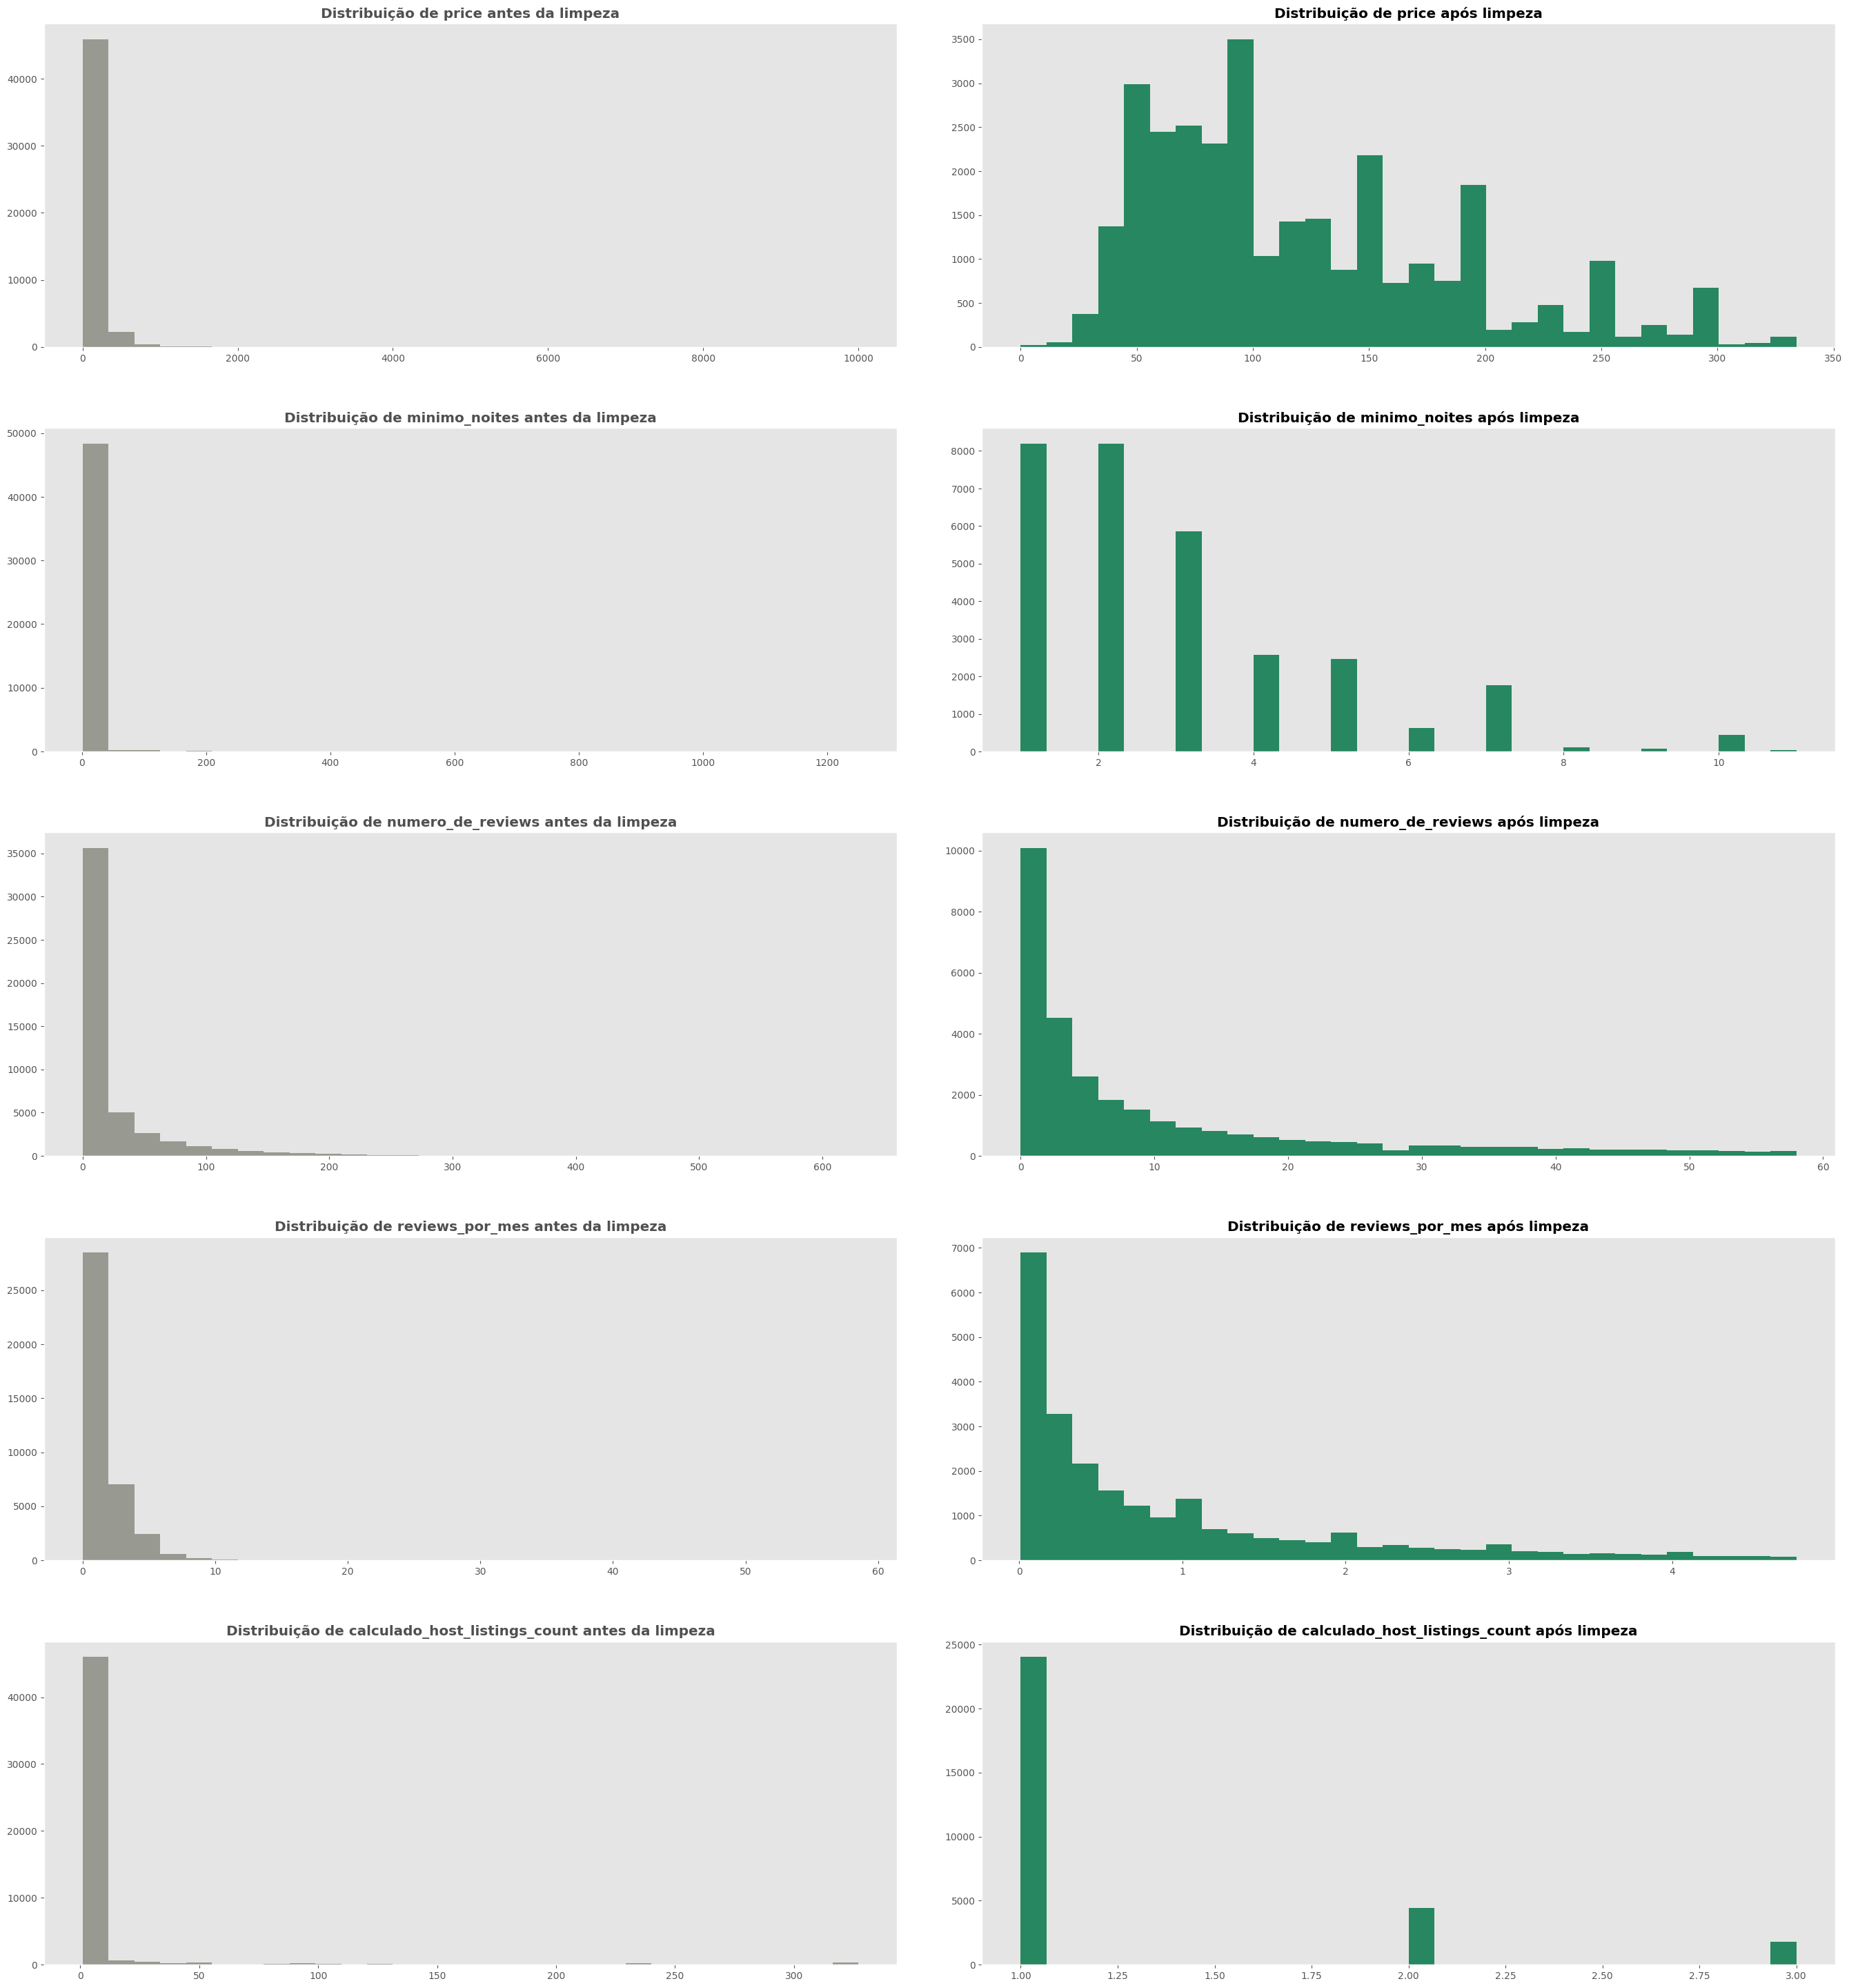

In [17]:
# Gera a figura para plotar os gráficos
fig, axes = plt.subplots(5, 2, figsize=(28, 30))
hist1, hist2, hist3, hist4, hist5, hist6, hist7, hist8, hist9, hist10 = axes.flatten()

# Plota o histograma para a variável price antes e após a limpeza
hist1.hist(df.price, bins=30, color="#989A91")
hist1.set_title("Distribuição de price antes da limpeza", color="#505050", fontweight='bold')
hist1.grid(False)

hist2.hist(df_limpo.price, bins=30, color="#278760")
hist2.set_title("Distribuição de price após limpeza", color="black", fontweight='bold')
hist2.grid(False)

# Plota o histograma para a variável minimo_noites antes e após a limpeza
hist3.hist(df.minimo_noites, bins=30, color="#989A91")
hist3.set_title("Distribuição de minimo_noites antes da limpeza", color="#505050", fontweight='bold')
hist3.grid(False)

hist4.hist(df_limpo.minimo_noites, bins=30, color="#278760")
hist4.set_title("Distribuição de minimo_noites após limpeza", color="black", fontweight='bold')
hist4.grid(False)

# Plota o histograma para a variável numero_de_reviews antes e após a limpeza
hist5.hist(df.numero_de_reviews, bins=30, color="#989A91")
hist5.set_title("Distribuição de numero_de_reviews antes da limpeza", color="#505050", fontweight='bold')
hist5.grid(False)

hist6.hist(df_limpo.numero_de_reviews, bins=30, color="#278760")
hist6.set_title("Distribuição de numero_de_reviews após limpeza", color="black", fontweight='bold')
hist6.grid(False)

# Plota o histograma para a variável reviews_por_mes antes e após a limpeza
hist7.hist(df.reviews_por_mes, bins=30, color="#989A91")
hist7.set_title("Distribuição de reviews_por_mes antes da limpeza", color="#505050", fontweight='bold')
hist7.grid(False)

hist8.hist(df_limpo.reviews_por_mes, bins=30, color="#278760")
hist8.set_title("Distribuição de reviews_por_mes após limpeza", color="black", fontweight='bold')
hist8.grid(False)

# Plota o histograma para a variável calculado_host_listings_count antes e após a limpeza
hist9.hist(df.calculado_host_listings_count, bins=30, color="#989A91")
hist9.set_title("Distribuição de calculado_host_listings_count antes da limpeza", color="#505050", fontweight='bold')
hist9.grid(False)

hist10.hist(df_limpo.calculado_host_listings_count, bins=30, color="#278760")
hist10.set_title("Distribuição de calculado_host_listings_count após limpeza", color="black", fontweight='bold')
hist10.grid(False)

# Ajusta o layout para evitar sobreposição
fig.tight_layout(pad=5.0)


In [18]:
# Descreve a estatística das variáveis após a limpeza do DataFrame
df_limpo[['price', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 'calculado_host_listings_count', 'disponibilidade_365',]].describe()

,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,30307.000000,30307.000000,30307.000000,24041.000000,30307.000000,30307.000000
mean,121.087043,2.872274,9.973735,0.895013,1.266803,72.500544
std,67.264008,1.951319,13.445465,1.042824,0.561726,113.563329
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.140000,1.000000,0.000000
50%,100.000000,2.000000,4.000000,0.460000,1.000000,1.000000
75%,160.000000,4.000000,14.000000,1.240000,1.000000,98.500000
max,334.000000,11.000000,58.000000,4.760000,3.000000,365.000000


No resumo estatístico após limpeza, podemos observar:

- O número de linhas diminuiu de 48.894 para 30.307, indicando que a limpeza removeu cerca de 36,5% dos dados.
- A média de price caiu de 152,72 para 121,08, indicando que os preços altos foram removidos.
- A média de numero_de_reviews caiu de 23,27 para 9,9, sugerindo que anúncios com muitas avaliações foram excluídos.
- O desvio padrão de price caiu de 240,16 para 67,34, mostrando que os dados estão menos dispersos após a limpeza.

---

#### **1.6 - Análise Univariada**

---

##### **1.6.1 - Variável price**

In [19]:
# Verifica a quantidade de valores únicos
df_limpo['price'].nunique()

305

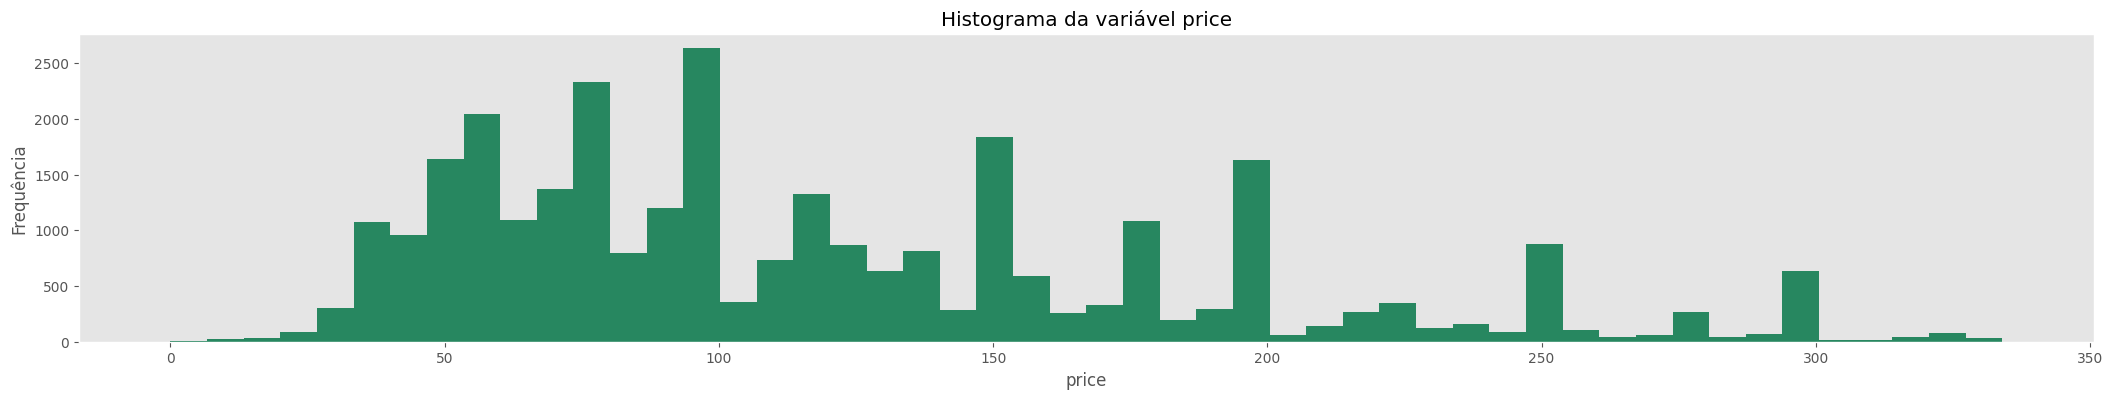

In [20]:
# Plotando o histograma da variável 'price'
df_limpo['price'].hist(bins=50, figsize=(26, 4), grid=False, color="#278760")
plt.title('Histograma da variável price')
plt.xlabel('price')
plt.ylabel('Frequência')
plt.show()

- A maior parte dos dados se concentra entre 50 e 150, indicando que a maioria dos preços se encontra nessa faixa, o que sugere que a maioria dos produtos ou serviços são mais baratos.
- A cauda direita do histograma é mais longa que a esquerda, indicando uma assimetria positiva. Isso significa que há alguns valores de preço muito altos que "puxam" a média para cima, enquanto a maioria dos valores está concentrada em uma faixa mais baixa.

---

##### **1.6.2 - Variável minimo_noites**

In [21]:
# Verifica a quantidade de valores únicos
df_limpo['minimo_noites'].nunique()

11

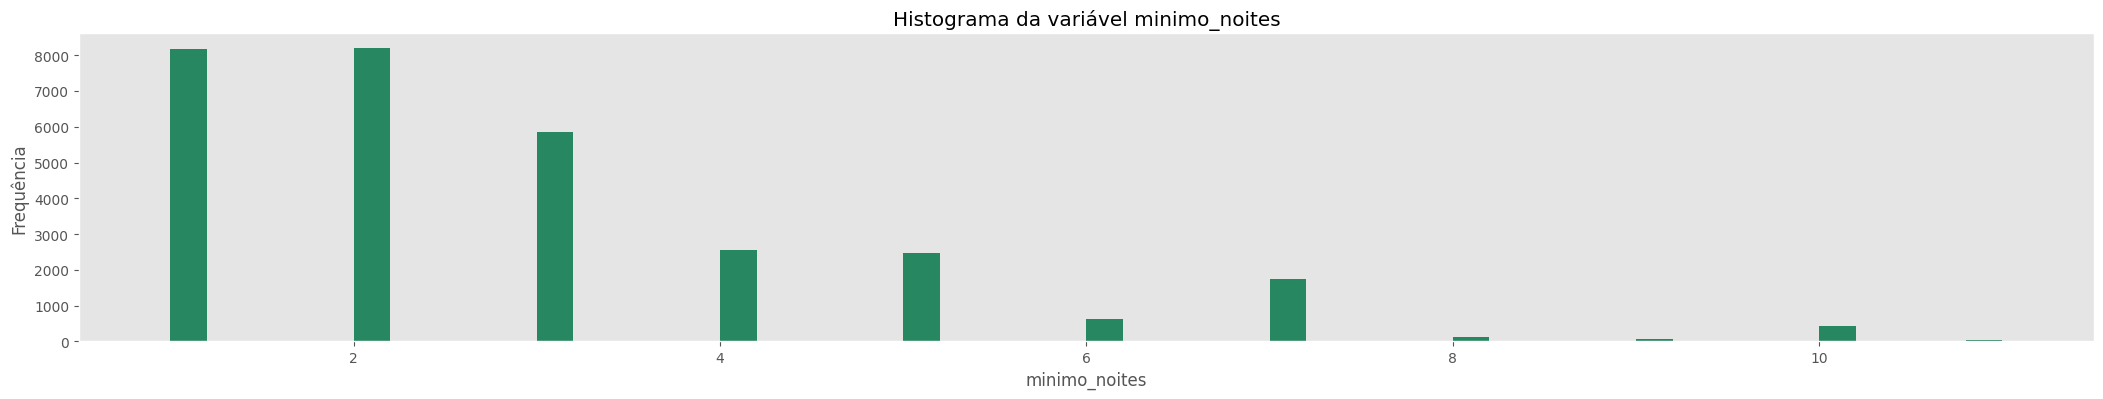

In [22]:
# Plota o histograma da variável 'minimo_noites'
df_limpo['minimo_noites'].hist(bins=50, figsize=(26, 4), grid=False, color="#278760")
plt.title('Histograma da variável minimo_noites')
plt.xlabel('minimo_noites')
plt.ylabel('Frequência')
plt.show()

In [23]:
# Verifica a descrição estatística
df_limpo[['minimo_noites']].describe()

,minimo_noites
count,30307.000000
mean,2.872274
std,1.951319
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,11.000000


- A maioria das propriedades exige um número mínimo de noites relativamente baixo. Isso indica demanda de estadias curtas.
- Distribuição assimétrica à direita
- A média do número mínimo de noites é de aproximadamente 2,87 noites
- O desvio padrão é de 1,95 noites. Isso indica que há uma variação considerável no número mínimo de noites exigido pelas propriedades.

In [24]:
# Categoriza 'price' em tercis
tercis_price = df_limpo['price'].quantile([0, 0.33, 0.67, 1])
df_limpo['faixa_preco'] = pd.cut(df_limpo['price'], bins=tercis_price, labels=['baixo', 'medio', 'alto'])

# Categoriza 'minimo_noites' em tercis
tercis_noites = df_limpo['minimo_noites'].quantile([0, 0.33, 0.67, 1])
df_limpo['faixa_noites'] = pd.cut(df_limpo['minimo_noites'], bins=tercis_noites, labels=['curta', 'media', 'longa'])

# Cria uma tabela de contingência
tc_noites = pd.crosstab(df_limpo['faixa_preco'], df_limpo['faixa_noites'])
print(tc_noites)

faixa_noites  curta  media  longa
faixa_preco                      
baixo          2582   1594   2419
medio          2767   2041   2737
alto           2849   2220   2910


Para permitir a análise estatística, vamos transformar as variáveis numéricas em categóricas por meio de agrupamento em categorias.
- Estadia curta, média e longa
- Preço baixo, médio e alto.

In [25]:
chi2, p_valor, graus_liberdade, frequencias_esperadas = stats.chi2_contingency(tc_noites)
print(f'Chi-quadrado: {chi2}')
print(f'P-valor: {p_valor}')
print(f'Frequências esperadas: \n{frequencias_esperadas}')
     

Chi-quadrado: 31.848514620851358
P-valor: 2.0544356434198924e-06
Frequências esperadas: 
[[2444.31529454 1745.72652471 2404.95818075]
 [2796.41529906 1997.19584972 2751.38885121]
 [2957.26940639 2112.07762557 2909.65296804]]


Aqui, transformamos as variáveis numéricas price e minimo_noites em variáveis categóricas e aplicamos o teste de chi-quadrado, ideal para variáveis categóricas.

- H0 - Não há diferença significativa entre as frequências observadas e esperadas, o que, por sua vez, sugere que as variáveis são independentes.
- H1 - HA (Hipótese Alternativa) = Há diferença significativa entre as frequências observadas e esperadas,ou seja, as variáveis não são independentes, há associação.

O valor de p obtido é menor que o nível de significância estabelecido a priori de 0.05. Diante desse resultado, rejeitamos a hipótese nula de que as variáveis são indepedentes. 

Portanto, com base no valor de p obtido, podemos concluir que há uma associação estatisticamente significativa entre as variáveis.

**Isso sugere uma forte evidência de que há uma associação significativa entre o número mínimo de noites e o preço.**

---

##### **1.6.3 - Váriavel numero_de_reviews**

In [26]:
# Verifica a quantidade de valores únicos
df_limpo['numero_de_reviews'].nunique()

59

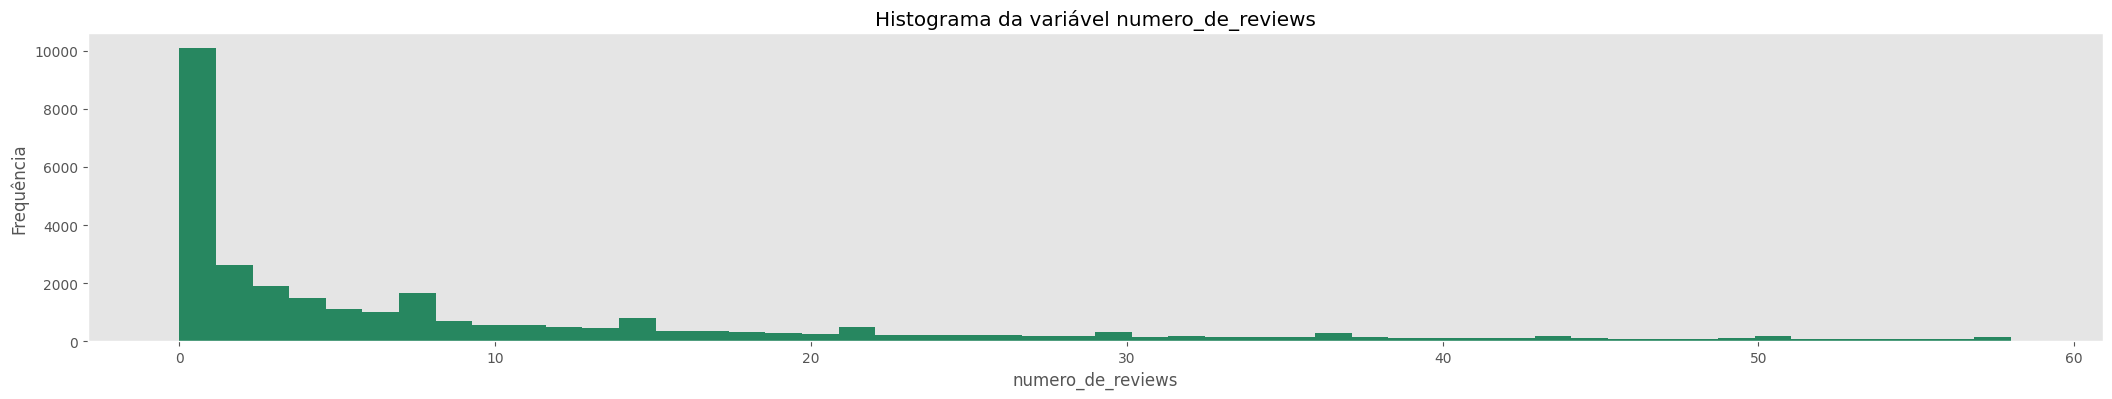

In [27]:
# Plota o histograma da variável 'numero_de_reviews'
df_limpo['numero_de_reviews'].hist(bins=50, figsize=(26, 4), grid=False, color="#278760")
plt.title('Histograma da variável numero_de_reviews')
plt.xlabel('numero_de_reviews')
plt.ylabel('Frequência')
plt.show()

In [28]:
# Verifica a descrição estatística
df_limpo[['numero_de_reviews']].describe()

,numero_de_reviews
count,30307.000000
mean,9.973735
std,13.445465
min,0.000000
25%,1.000000
50%,4.000000
75%,14.000000
max,58.000000


- A maioria das propriedades possui um número relativamente baixo de avaliações, com um pico nas primeiras faixas.
- O histograma apresenta distribuição assimétrica à direita
- A média do número de reviews é de aproximadamente 9,97
- O desvio padrão é de 13,44. Isso indica que há uma variação considerável no número de reviews entre as propriedades.


In [29]:
# Divide o número de reviews em tercis
tercis_reviews = df_limpo['numero_de_reviews'].quantile([0, 0.33, 0.67, 1])
df_limpo['faixa_reviews'] = pd.cut(df_limpo['numero_de_reviews'], bins=tercis_reviews, labels=['poucos', 'moderados', 'muitos'])

# Criar a tabela de contingência
tc_n_reviews = pd.crosstab(df_limpo['faixa_preco'], df_limpo['faixa_reviews'])

In [30]:
chi2, p_valor, graus_liberdade, frequencias_esperadas = stats.chi2_contingency(tc_n_reviews)
print(f'Chi-quadrado: {chi2}')
print(f'P-valor: {p_valor}')
print(f'Frequências esperadas: \n{frequencias_esperadas}')

Chi-quadrado: 48.16419453834202
P-valor: 8.722518335864261e-10
Frequências esperadas: 
[[1262.56487375 3461.73293398 3214.70219227]
 [1317.11327426 3611.29514539 3353.59158035]
 [1243.32185199 3408.97192063 3165.70622738]]


Aqui, transformamos as variáveis numéricas price e numero_de_reviews em variáveis categóricas e aplicamos o teste de chi-quadrado, ideal para variáveis categóricas.

- H0 - Não há diferença significativa entre as frequências observadas e esperadas, o que, por sua vez, sugere que as variáveis são independentes.
- H1 - HA (Hipótese Alternativa) = Há diferença significativa entre as frequências observadas e esperadas,ou seja, as variáveis não são independentes, há associação.

O valor de p obtido é menor que o nível de significância estabelecido a priori de 0.05. Diante desse resultado, rejeitamos a hipótese nula de que as variáveis são indepedentes. 

Portanto, com base no valor de p obtido, podemos concluir que há uma associação estatisticamente significativa entre as variáveis.

**Isso sugere uma forte evidência de que há uma associação significativa entre o número de reviews e o preço.**

---

##### **1.6.4 - Váriavel reviews_por_mes**

In [31]:
# Verifica a quantidade de valores únicos
df_limpo['reviews_por_mes'].nunique()

472

In [32]:
df['reviews_por_mes'].value_counts()

reviews_por_mes
0.02     919
0.05     893
1.00     893
0.03     804
0.16     667
        ... 
7.85       1
7.29       1
10.37      1
9.21       1
10.54      1
Name: count, Length: 937, dtype: int64

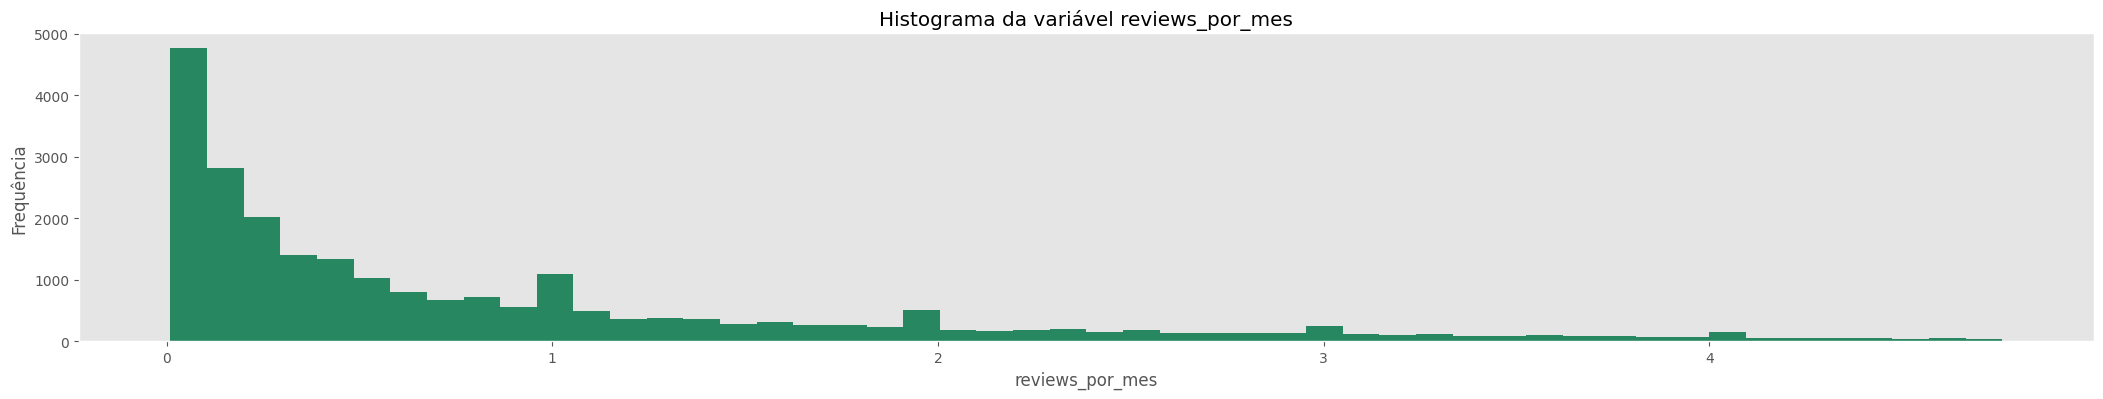

In [33]:
# Plota o histograma da variável 'reviews_por_mes'
df_limpo['reviews_por_mes'].hist(bins=50, figsize=(26, 4), grid=False, color="#278760")
plt.title('Histograma da variável reviews_por_mes')
plt.xlabel('reviews_por_mes')
plt.ylabel('Frequência')
plt.show()

In [34]:
# Verifica a descrição estatística
df_limpo[['reviews_por_mes']].describe()

,reviews_por_mes
count,24041.000000
mean,0.895013
std,1.042824
min,0.010000
25%,0.140000
50%,0.460000
75%,1.240000
max,4.760000


Nota-se que:
- A maioria das propriedades recebe um número relativamente baixo de reviews por mês.
- A distribuição é assimétrica à direita.
- A média de reviews por mês é de aproximadamente 0,89. Isso significa que, em média, as propriedades recebem menos de 1 review por mês.

In [35]:
# Dividir o número de reviews por mês em tercis
tercis_reviews_mes = df_limpo['reviews_por_mes'].quantile([0, 0.33, 0.67, 1])
df_limpo['faixa_reviews_mes'] = pd.cut(df_limpo['reviews_por_mes'], bins=tercis_reviews_mes, labels=['poucos', 'moderados', 'muitos'])

# Criar a tabela de contingência
tc_m_reviews = pd.crosstab(df_limpo['faixa_preco'], df_limpo['faixa_reviews_mes'])
print(tc_m_reviews)

faixa_reviews_mes  poucos  moderados  muitos
faixa_preco                                 
baixo                2763       2579    2590
medio                2805       2782    2685
alto                 2436       2767    2602


In [36]:
chi2, p_valor, graus_liberdade, frequencias_esperadas = stats.chi2_contingency(tc_m_reviews)
print(f'Chi-quadrado: {chi2}')
print(f'P-valor: {p_valor}')
print(f'Frequências esperadas: \n{frequencias_esperadas}')

Chi-quadrado: 27.97330987549858
P-valor: 1.2629252555303216e-05
Frequências esperadas: 
[[2644.33037611 2685.29701362 2602.37261027]
 [2757.6778708  2800.40051647 2713.92161273]
 [2601.99175309 2642.30246991 2560.705777  ]]


Aqui, transformamos as variáveis numéricas price e reviews_por_mes em variáveis categóricas e aplicamos o teste de chi-quadrado, ideal para variáveis categóricas.

- H0 - Não há diferença significativa entre as frequências observadas e esperadas, o que, por sua vez, sugere que as variáveis são independentes.
- H1 - HA (Hipótese Alternativa) = Há diferença significativa entre as frequências observadas e esperadas,ou seja, as variáveis não são independentes, há associação.

O valor de p obtido é menor que o nível de significância estabelecido a priori de 0.05. Diante desse resultado, rejeitamos a hipótese nula de que as variáveis são indepedentes. 

Portanto, com base no valor de p obtido, podemos concluir que há uma associação estatisticamente significativa entre as variáveis.

**Isso sugere uma forte evidência de que há uma associação significativa entre o número de reviews por mês e o preço.**

---

##### **1.6.5 - Váriavel calculado_host_listing_counts**

In [37]:
# Verifica a quantidade de valores únicos
df_limpo['calculado_host_listings_count'].nunique()

3

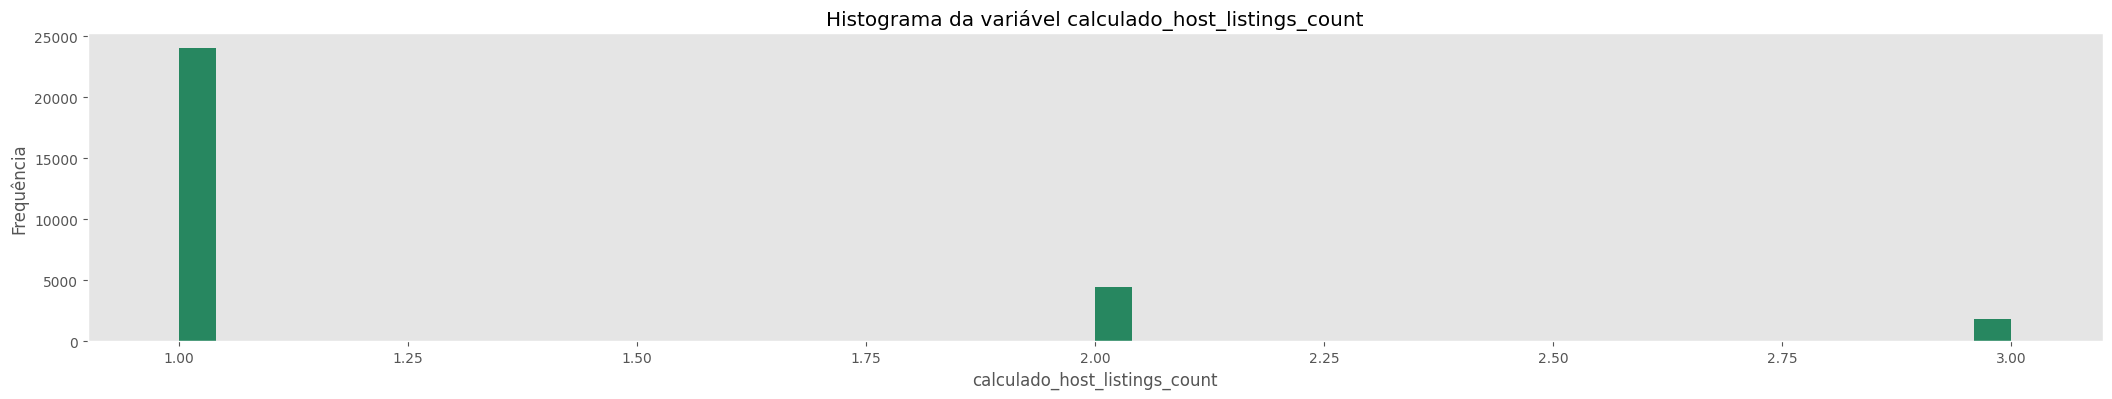

In [38]:
# Plota o histograma da variável 'calculado_host_listings_count'
df_limpo['calculado_host_listings_count'].hist(bins=50, figsize=(26, 4), grid=False, color="#278760")
plt.title('Histograma da variável calculado_host_listings_count')
plt.xlabel('calculado_host_listings_count')
plt.ylabel('Frequência')
plt.show()

In [39]:
# Verifica a descrição estatística
df['calculado_host_listings_count'].value_counts()
df_limpo[['calculado_host_listings_count']].describe()

,calculado_host_listings_count
count,30307.000000
mean,1.266803
std,0.561726
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,3.000000


Nota-se que:

- A grande maioria das observações está concentrada em 1.0.
- A média é de aproximadamente 1,27. Isso significa que, em média, os anfitriões possuem 1,27 listagens.
- O desvio padrão é relativamente baixo. Isso indica que a maioria dos anfitriões tem um número pequeno de listagens.

In [40]:
# Dividir o número de listagens em duas categorias
df_limpo['faixa_listagem'] = pd.cut(df_limpo['calculado_host_listings_count'], bins=[1, 2, np.inf], labels=['1 listagem', '2 ou mais listagens'])

# Criar a tabela de contingência
tc_m_reviews = pd.crosstab(df_limpo['faixa_preco'], df_limpo['faixa_listagem'])
print(tc_m_reviews)

faixa_listagem  1 listagem  2 ou mais listagens
faixa_preco                                    
baixo                 1940                  850
medio                 1448                  570
alto                  1063                  397


In [41]:
chi2, p_valor, graus_liberdade, frequencias_esperadas = stats.chi2_contingency(tc_m_reviews)
print(f'Chi-quadrado: {chi2}')
print(f'P-valor: {p_valor}')
print(f'Frequências esperadas: \n{frequencias_esperadas}')

Chi-quadrado: 5.788883319864537
P-valor: 0.05532990937727212
Frequências esperadas: 
[[1981.220485  808.779515]
 [1433.011806  584.988194]
 [1036.767709  423.232291]]


Aqui, transformamos as variáveis numéricas price e calculado_host_listings_count em variáveis categóricas e aplicamos o teste de chi-quadrado, ideal para variáveis categóricas.

- H0 - Não há diferença significativa entre as frequências observadas e esperadas, o que, por sua vez, sugere que as variáveis são independentes.
- H1 - HA (Hipótese Alternativa) = Há diferença significativa entre as frequências observadas e esperadas,ou seja, as variáveis não são independentes, há associação.

O valor de p obtido é maior que o nível de significância estabelecido a priori de 0.05. Diante desse resultado, não podemos rejeitar a hipótese nula de que as variáveis são indepedentes. 

Portanto, com base no valor de p obtido, podemos concluir que não há uma associação estatisticamente significativa entre as variáveis.

**Não há evidências suficientes para afirmar que anfitriões com múltiplas listagens cobram preços significativamente diferentes daqueles com apenas uma listagem**

---

##### **1.6.5 - Váriavel disponibilidade_365**

In [42]:
# Verifica a quantidade de valores únicos
df_limpo['disponibilidade_365'].nunique()

366

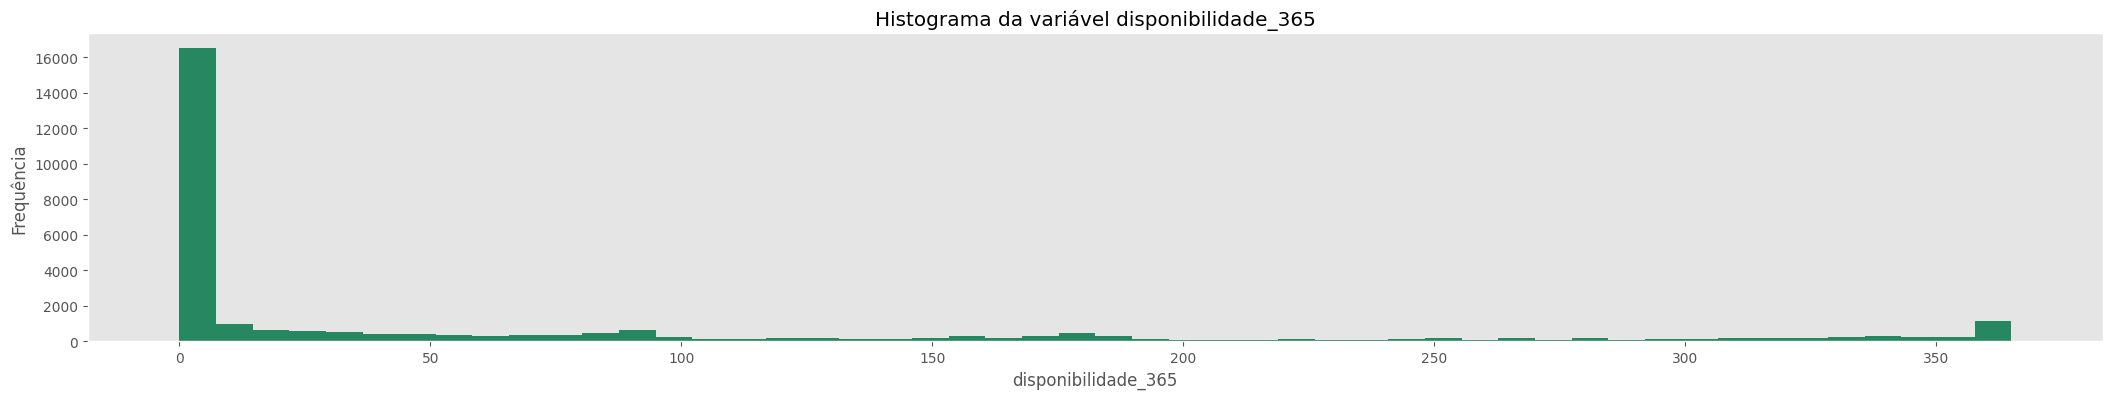

In [43]:
# Plota o histograma da variável 'disponibilidade_365'
df_limpo['disponibilidade_365'].hist(bins=50, figsize=(26, 4), grid=False, color="#278760")
plt.title('Histograma da variável disponibilidade_365')
plt.xlabel('disponibilidade_365')
plt.ylabel('Frequência')
plt.show()

In [44]:
# Verifica a descrição estatística
df['disponibilidade_365'].value_counts()
df_limpo[['disponibilidade_365']].describe()

,disponibilidade_365
count,30307.000000
mean,72.500544
std,113.563329
min,0.000000
25%,0.000000
50%,1.000000
75%,98.500000
max,365.000000


Nota-se que:

- A maioria dos imóveis tem baixa disponibilidade ao longo do ano.
- A distribuição é altamente assimétrica à direita, com uma longa cauda. Isso indica que há um grande número de imóveis com baixa disponibilidade e alguns com disponibilidade muito alta.
- A média de disponibilidade é de 72 dias no ano
- 50% dos imóveis tem um dia disponível ou menos

In [45]:
# Definindo os intervalos para as categorias de disponibilidade
bins = [0, 90, 180, 365]
labels = ['Baixa', 'Média', 'Alta']

# Criando a nova coluna com as categorias
df_limpo['faixa_disponibilidade'] = pd.cut(df_limpo['disponibilidade_365'], bins=bins, labels=labels)

# Criar a tabela de contingência
tc_disp = pd.crosstab(df_limpo['faixa_preco'], df_limpo['faixa_disponibilidade'])
print(tc_disp)

faixa_disponibilidade  Baixa  Média  Alta
faixa_preco                              
baixo                   2232    860  1670
medio                   2604    891  1614
alto                    2630    961  1834


In [46]:
chi2, p_valor, graus_liberdade, frequencias_esperadas = stats.chi2_contingency(tc_disp)
print(f'Chi-quadrado: {chi2}')
print(f'P-valor: {p_valor}')
print(f'Frequências esperadas: \n{frequencias_esperadas}')

Chi-quadrado: 18.415552829916862
P-valor: 0.0010233982295953265
Frequências esperadas: 
[[2324.33917364  844.30857741 1593.35224895]
 [2493.7103818   905.83211297 1709.45750523]
 [2647.95044456  961.85930962 1815.19024582]]


Aqui, transformamos as variáveis numéricas price e disponibilidade_365 em variáveis categóricas e aplicamos o teste de chi-quadrado, ideal para variáveis categóricas.

- H0 - Não há diferença significativa entre as frequências observadas e esperadas, o que, por sua vez, sugere que as variáveis são independentes.
- H1 - HA (Hipótese Alternativa) = Há diferença significativa entre as frequências observadas e esperadas,ou seja, as variáveis não são independentes, há associação.

O valor de p obtido é menor que o nível de significância estabelecido a priori de 0.05. Diante desse resultado, podemos rejeitar a hipótese nula de que as variáveis são indepedentes. 

Portanto, com base no valor de p obtido, podemos concluir que há uma associação estatisticamente significativa entre as variáveis.

**Há evidências suficientes para afirmar que existe uma relação significativa entre a faixa de disponibilidade e a faixa de preço dos imóveis**

---
#### **1.7 - Distribuição das variáveis categóricas**

Para visualizar a distribuição das variáveis categóricas nome, host_name, bairro_group, bairro e room_type, serão usados gráficos de barras e contagens. 

No entanto, como nome e host_name tem valores únicos, serão excluídos, sendo mais útil analisar categorias mais frequentes.

---
##### **1.7.1 - Distribuição de room_type**

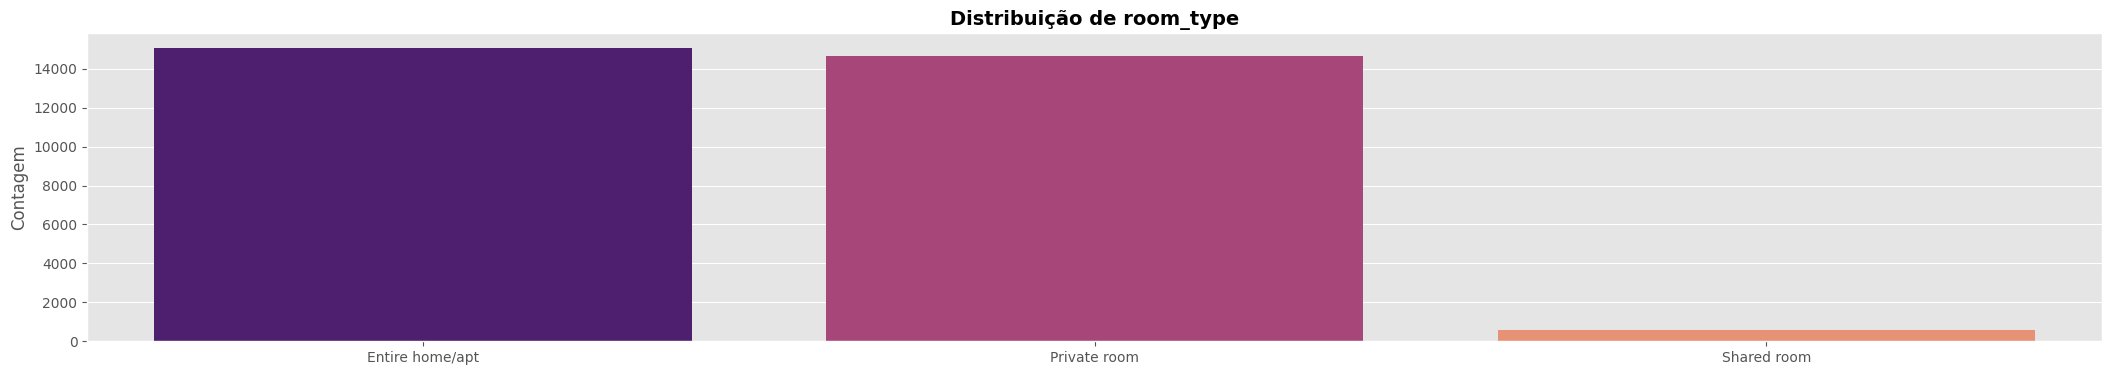

In [47]:
# Plota o gráfico de barras para a variável
plt.figure(figsize=(26, 4))
sns.countplot(data=df_limpo, x='room_type', hue='room_type', palette='magma', legend=False, dodge=False)
plt.title('Distribuição de room_type', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('Contagem')
plt.show()

O gráfico acima apresenta a distribuição dos tipos de quartos do dataset.

* Apartamentos e casas no seu todo são o tipo mais comum, seguido de quartos privativos e quartos compartilhados.

---
##### **1.7.2 - Distribuição de bairro_group**

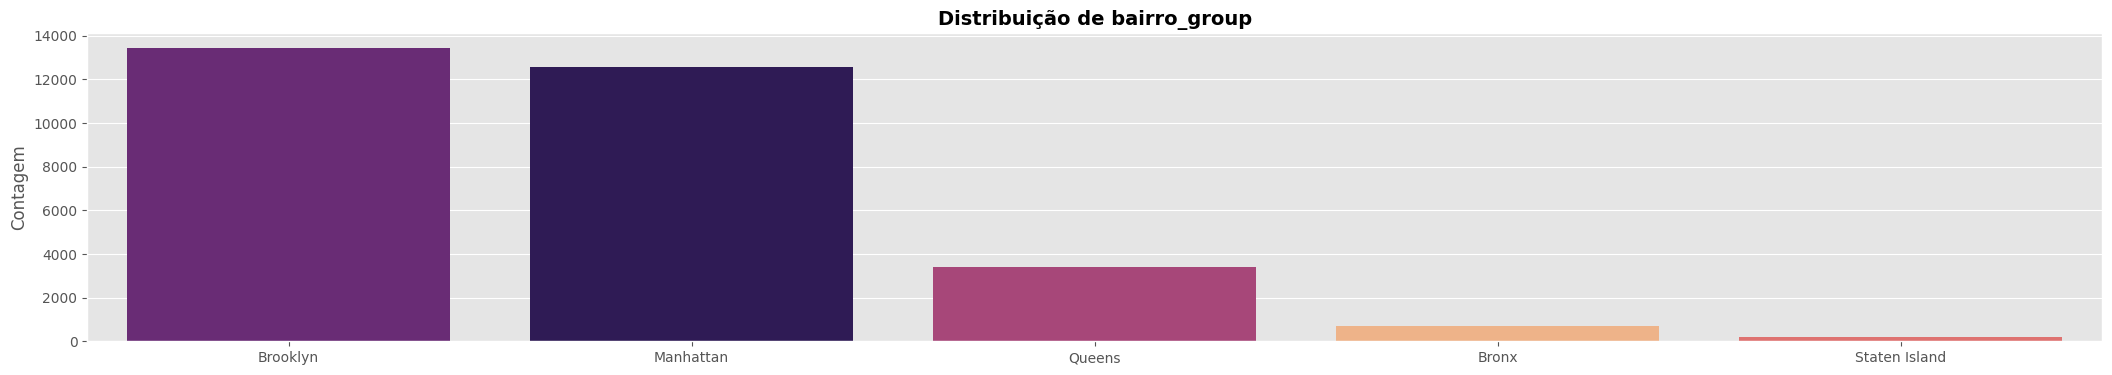

In [48]:
# Contagem de bairros
bairro_counts = df_limpo['bairro_group'].value_counts().index

# Plota o gráfico de barras, ordenando pelo número de ocorrências
plt.figure(figsize=(26, 4))
sns.countplot(data=df_limpo, x='bairro_group', hue='bairro_group', palette='magma', legend=False, dodge=False, order=bairro_counts)
plt.title('Distribuição de bairro_group', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('Contagem')
plt.show()

O gráfico acima apresenta a distribuição dos bairros onde os anúncios estão localizados.

* Manhattan é o bairro com maior número de anúncios, seguido do Brooklyn e do Queens.

---
##### **1.7.3 Distribuição de bairro**

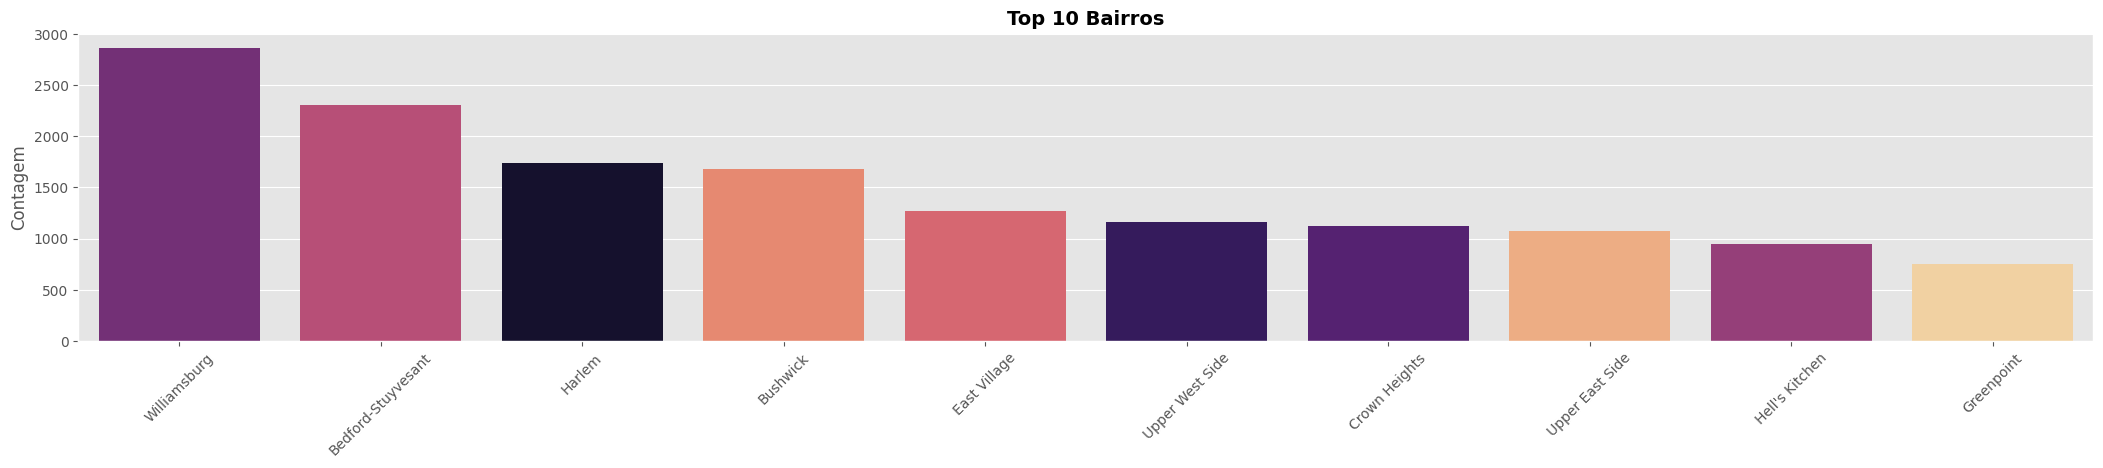

In [49]:
# Plota o gráfico de barras
top_bairros = df_limpo['bairro'].value_counts().nlargest(10).index
df_top_bairros = df_limpo[df_limpo['bairro'].isin(top_bairros)]
plt.figure(figsize=(26, 4))
sns.countplot(data=df_top_bairros, x='bairro', hue='bairro', palette='magma', legend=False, dodge=False, order=top_bairros)
plt.title('Top 10 Bairros', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

    O gráfico acima apresenta a distribuição das áreas onde os anúncios estão localizados.

    * Williamsburg é a área com maior número de anúncios, seguido de Bedford-Stuyvesant e do Harlem.

---
##### **1.7.4 Distribuição de nome**

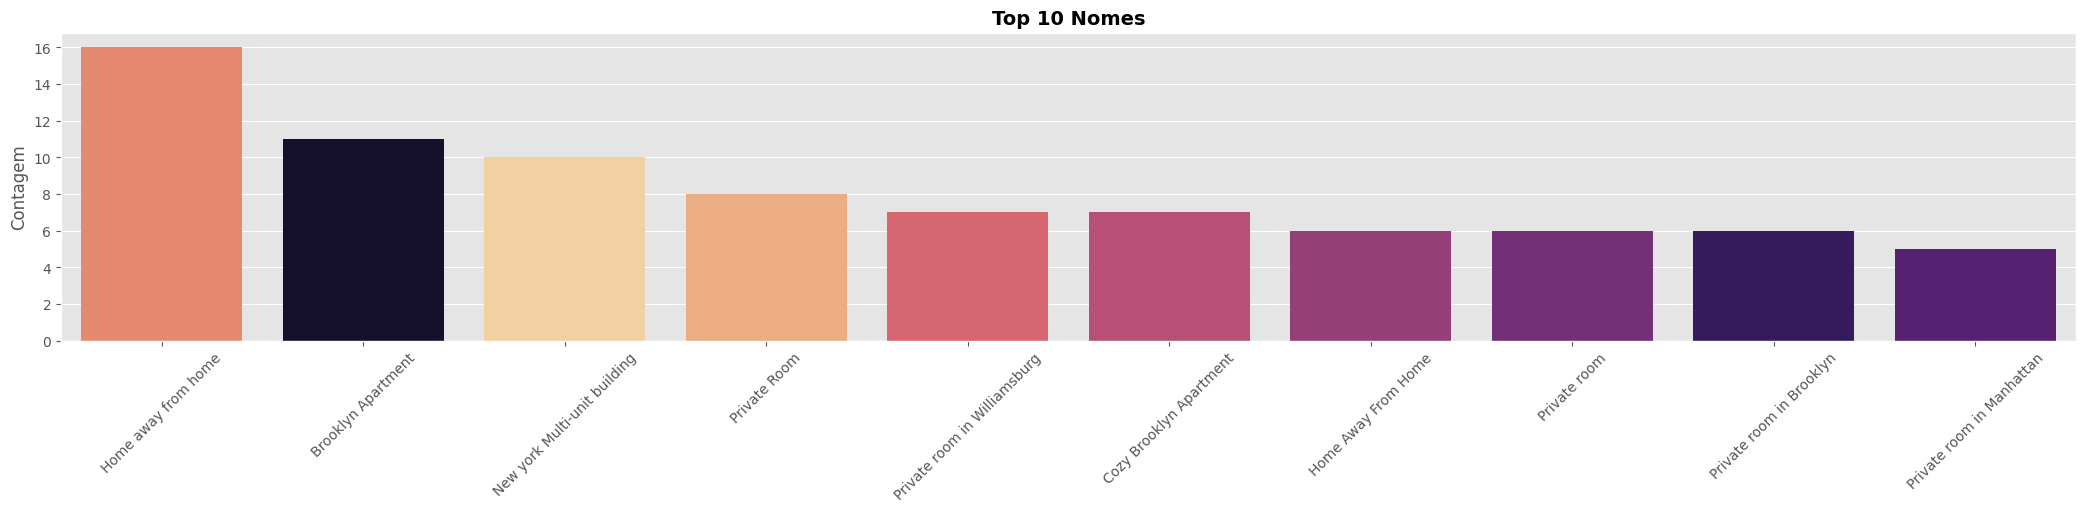

In [50]:
# Plota o gráfico de barras
top_nomes = df_limpo['nome'].value_counts().nlargest(10).index
df_top_nomes = df_limpo[df_limpo['nome'].isin(top_nomes)]
plt.figure(figsize=(26, 4))
sns.countplot(data=df_top_nomes, x='nome', hue='nome', palette='magma', legend=False, dodge=False, order=top_nomes)
plt.title('Top 10 Nomes', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

O gráfico acima apresenta a distribuição das áreas onde os anúncios estão localizados.

* Home away from home tem o maior número de anúncios, seguido de New York Multi-unit building e Brooklyn Apartment.

---
#### **1.8 - Correlação entre as variáveis**

A correlação entre variáveis mede o grau de associação entre elas, indicando se e como uma variável muda em relação a outra. É um passo importante para identificar as relações existentes nos dados, como padrões ou tendências.

Na correlação, os valores -1 e +1 indicam a força e a direção do relacionamento entre duas variáveis. Um valor de +1 significa que as variáveis estão correlacionadas de forma positiva, ou seja, aumentam proporcionalmente. Já um valor de -1 indica uma correlação negativa, onde, se uma variável aumenta, a outra diminui na mesma proporção.

Foram realizados os processos de matriz de correlação e e heatmap para visualização.

---
##### **1.8.1 - Correlação entre as variáveis numéricas**

In [51]:
# Correlaciona as variáveis numéricas
corr_num = df_limpo[['price', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 'calculado_host_listings_count', 'disponibilidade_365']].corr()

# Exibe a matriz de correlação
display(corr_num)

,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
price,1.000000,0.051072,-0.000112,0.015547,-0.118578,0.042449
minimo_noites,0.051072,1.000000,-0.058832,-0.182600,-0.064699,-0.048978
numero_de_reviews,-0.000112,-0.058832,1.000000,0.471445,0.120548,0.232739
reviews_por_mes,0.015547,-0.182600,0.471445,1.000000,0.136355,0.266598
calculado_host_listings_count,-0.118578,-0.064699,0.120548,0.136355,1.000000,0.233266
disponibilidade_365,0.042449,-0.048978,0.232739,0.266598,0.233266,1.000000


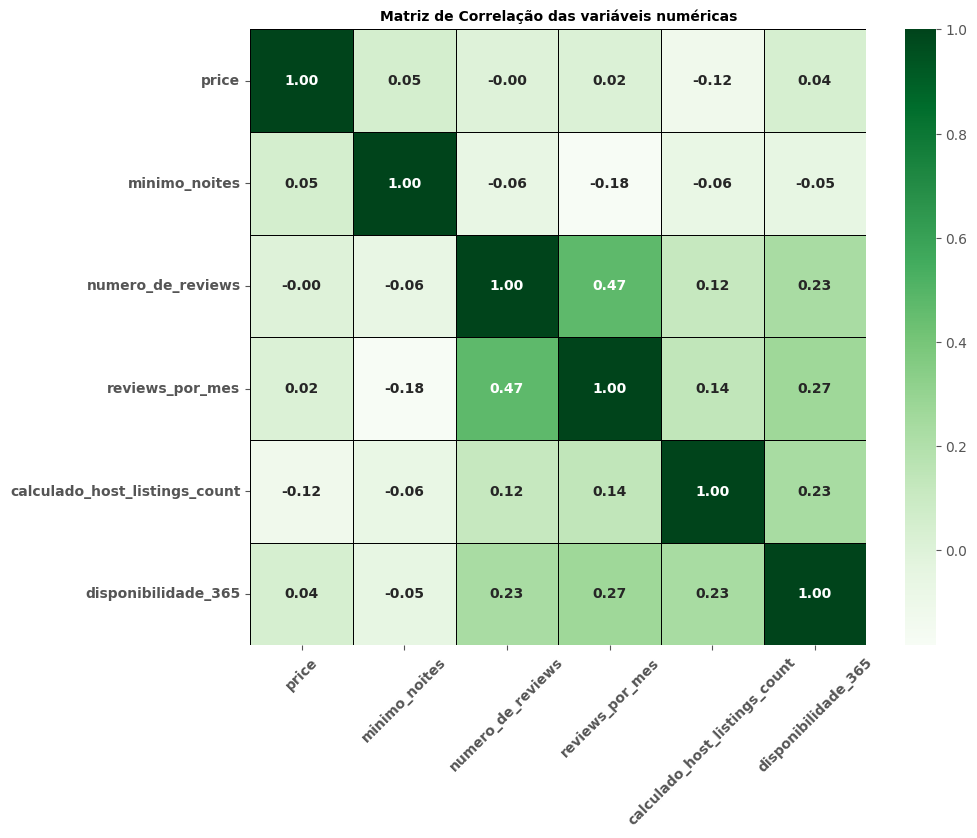

In [52]:
# Plota o Heatmap a partir das correlações
plt.figure(figsize=(10, 8)) 
sns.heatmap(
    corr_num, 
    cmap='Greens',  
    fmt='.2f',  
    annot=True,  
    annot_kws={"fontweight": "bold"},  
    square=True,  
    linecolor='black',  
    linewidths=0.5 
)
plt.xticks(fontweight='bold', rotation=45)  
plt.yticks(fontweight='bold')
plt.title('Matriz de Correlação das variáveis numéricas', fontsize=10, fontweight='bold')
plt.show()

Os resultados da correlação e do heatmap acima apresentam os níveis de relação entre as variáveis numéricas do DataFrame. Se nota:

- **price**
    - Tem uma correlação negativa muito fraca com todas as variáveis, indicando que anúncios de hosts com várias listagens podem ter preços ligeiramente menores.
    - Correlações com as outras variáveis são próximas de zero, indicando que o preço não é fortemente influenciado por estas variáveis, mas sim, por algum outro fator externo.

- **minimo_noites** 
    - As noites mínimas têm pouca influência sobre as outras variáveis.
    - As correlações são muito fracas, indicando pouca relação com as demais variáveis.

- **numero_de_reviews**
    - Tem uma correlação correlação positiva muito fraca com disponibilidade_365 (0,23), o que sugere que anúncios com mais avaliações tendem a ter mais disponibilidade por ano.
    - Anúncios mais ativos (com mais avaliações) tendem a estar pouco mais disponíveis.

- **reviews_por_mes**
    - Tem uma correlação positiva moderada com numero_de_reviews, sugerindo que anúncios com mais avaliações totais recebem mais avaliações por mês

- **calculado_host_listings_count**
    - Tem uma correlação positiva muito fraca com disponibilidade_365 (0,23), sugerindo que hosts com mais listagens tendem a ter anúncios com maior disponibilidade.

As demais correlações foram muito fracas.

**Conclusões Principais**

- O preço dos anúncios não é fortemente influenciado pelas outras variáveis analisadas, outro fator impacta esta variável.
- Anúncios com mais avaliações totais (numero_de_reviews) e mais avaliações por mês (reviews_por_mes) tendem a ter uma pequena maior disponibilidade.
- A disponibilidade tem correlação fraca com o número de avaliações, sugerindo que anúncios mais disponíveis são mais ativos e gerenciados por hosts experientes.
- Anúncios com um número maior de noites mínimas tendem a ter levemente menos avaliações por mês, possivelmente porque são menos atraentes para reservas de curta duração.

---
##### **1.8.2 - Correlação entre as variáveis categóricas**

Para calcular a correlação entre variáveis categóricas, precisaremos aplicar one-hot encoding, para então calcular sua correlação com o preço.

---
##### **1.8.3 - Correlação entre room_type e price**

In [53]:
# Cria uma cópia do dataframe, para aplicar encoding.
df_limpo_copia_1 = df_limpo.copy()

# Aplica one-hot encoding na variável categórica 'room_type'
df_limpo_copia_1 = pd.get_dummies(df_limpo_copia_1, columns=['room_type'])

# Seleciona as colunas de interesse para a matriz de correlação
colunas_correlacao = (
    [col for col in df_limpo_copia_1.columns if col.startswith('room_type_')] +
    ['price']
)

# Cria e exibe a matriz de correlação
matriz = df_limpo_copia_1[colunas_correlacao].corr()
display(matriz)

,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,price
room_type_Entire home/apt,1.000000,-0.962437,-0.138895,0.609427
room_type_Private room,-0.962437,1.000000,-0.135195,-0.581484
room_type_Shared room,-0.138895,-0.135195,1.000000,-0.103068
price,0.609427,-0.581484,-0.103068,1.000000


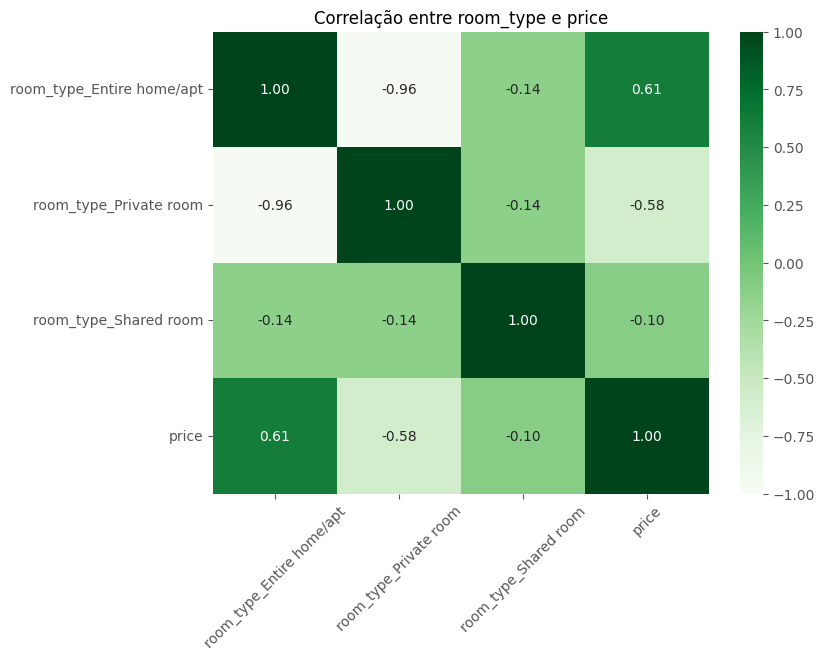

In [54]:
# Plota o Heatmap a partir das correlações
plt.figure(figsize=(8, 6))
sns.heatmap(
    matriz, 
    annot=True, 
    cmap='Greens',  
    fmt=".2f", 
    vmin=-1,
    vmax=1 
)
plt.title("Correlação entre room_type e price", fontsize=12)
plt.xticks(rotation=45)
plt.show()

Os resultados da correlação e do heatmap acima apresentam os níveis de relação entre a variável categórica room_type e a númerica price do DataFrame. Se nota:

- Há uma correlação positiva forte (0,61) entre anúncios do tipo "Entire home/apt" e o preço. Isso significa que, em geral, anúncios desse tipo tendem a ter preços mais altos.
- Há uma correlação negativa forte (-0.58) entre anúncios do tipo "Private room" e o preço. Isso indica que anúncios desse tipo tendem a ter preços mais baixos.
- Há uma correlação negativa muito fraca (-0.10) entre anúncios do tipo "Shared room" e o preço. Isso sugere que o tipo "Shared room" praticamente não influencia o preço.
- Há uma correlação negativa muito forte entre room_type_Entire home/apt e room_type_Private room: 
    - Isso é esperado, pois um anúncio não pode ser ao mesmo tempo "Entire home/apt" e "Private room". Quando uma categoria é 1, a outra tende a ser 0.

**Conclusões principais**

- Anúncios do tipo "Entire home/apt" estão associados a preços mais altos (correlação positiva de 0.61).
- Anúncios do tipo "Private room" estão associados a preços mais baixos (correlação negativa de -0.58).
- Anúncios do tipo "Shared room" praticamente não influenciam o preço (correlação muito próxima de zero).

---

##### **1.8.4 - Correlação entre bairro_group e price**

In [55]:
# Cria uma cópia do dataframe, para aplicar encoding.
df_limpo_copia_2 = df_limpo.copy()

# Filtra os 10 bairros mais frequentes
top_10_bairros = df_limpo_copia_2['bairro_group'].value_counts().nlargest(10).index

# Filtra o DataFrame para incluir apenas os 10 bairros mais frequentes
df_limpo_copia_2 = df_limpo_copia_2[df_limpo_copia_2['bairro_group'].isin(top_10_bairros)]

# Aplica one-hot encoding na variável categórica 'bairro_group'
df_limpo_copia_2 = pd.get_dummies(df_limpo_copia_2, columns=['bairro_group'])

# Seleciona as colunas de interesse para a matriz de correlação
colunas_correlacao = (
    [col for col in df_limpo_copia_2.columns if col.startswith('bairro_group_')] +
    ['price']  # preço
)

# Cria e mostra a matriz de correlação
matriz_bairro_group = df_limpo_copia_2[colunas_correlacao].corr()
display(matriz_bairro_group)

,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island,price
bairro_group_Bronx,1.000000,-0.136295,-0.128354,-0.054258,-0.012992,-0.093966
bairro_group_Brooklyn,-0.136295,1.000000,-0.750898,-0.317419,-0.076006,-0.173377
bairro_group_Manhattan,-0.128354,-0.750898,1.000000,-0.298925,-0.071578,0.298072
bairro_group_Queens,-0.054258,-0.317419,-0.298925,1.000000,-0.030257,-0.139941
bairro_group_Staten Island,-0.012992,-0.076006,-0.071578,-0.030257,1.000000,-0.029703
price,-0.093966,-0.173377,0.298072,-0.139941,-0.029703,1.000000


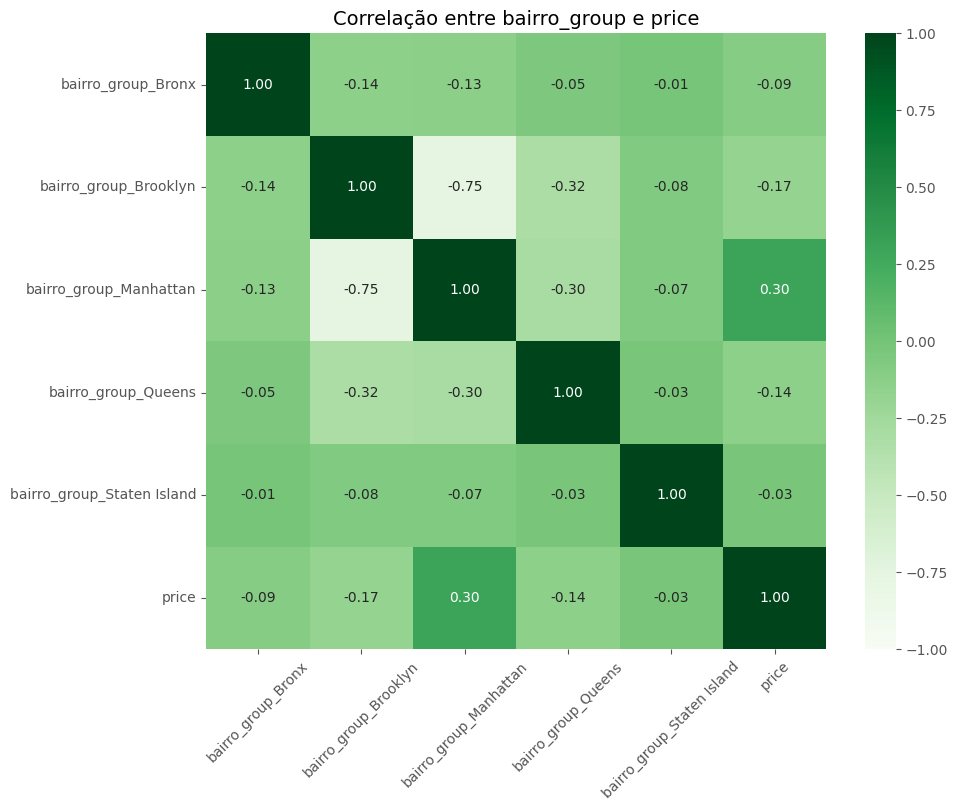

In [56]:
# Plota o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    matriz_bairro_group, 
    annot=True,  
    cmap='Greens',  
    fmt=".2f", 
    vmin=-1, 
    vmax=1
)
plt.title("Correlação entre bairro_group e price", fontsize=14)
plt.xticks(rotation=45)
plt.show()


Os resultados da correlação e do heatmap acima apresentam os níveis de relação entre a variável categórica bairro_group e a númerica price do DataFrame. Se nota:

- Há uma correlação positiva moderada (0.30) entre anúncios em Manhattan e o preço. Isso significa que anúncios em Manhattan tendem a ter preços mais altos.
- As demais correlações com o preço são muito fracas.

**Conclusões principais**
- Manhattan está associada a preços mais altos (correlação positiva de 0.3).
- Brooklyn e Queens estão associados a preços ligeiramente mais baixos.
- Bronx e Staten Island praticamente não influenciam o preço (correlações próximas de zero).
- Os bairros são mutuamente exclusivos (um anúncio pertence a apenas um bairro). Por isso, as correlações entre eles são negativas.


---

##### **1.8.5 - Correlação entre bairros e price**

In [57]:
# Faz uma cópia do DF e retira coluna já analisada
df_limpo_copia_3 = df_limpo.copy()
df_limpo_copia_3 = df_limpo_copia_3.drop(columns=['bairro_group'])

# Aplica encoding na variável categórica 'bairro'
df_encoded = pd.get_dummies(df_limpo_copia_3, columns=['bairro'], drop_first=True)

# Seleciona colunas de interesse (bairros codificados e price)
colunas_correlacao = [col for col in df_encoded.columns if col.startswith('bairro_')] + ['price']
df_correlacao = df_encoded[colunas_correlacao]

# Remove colunas com variância zero (constantes)
colunas_validas = df_correlacao.columns[df_correlacao.std() > 0]
df_correlacao = df_correlacao[colunas_validas]

# Filtra os 10 bairros mais frequentes
top_10_bairros = df_limpo_copia_3['bairro'].value_counts().nlargest(10).index
colunas_top_10 = [col for col in df_correlacao.columns if col.startswith('bairro_') and col.split('_')[1] in top_10_bairros] + ['price']
df_correlacao_top_10 = df_correlacao[colunas_top_10]

# Cria a matriz de correlação
matriz_correlacao = df_correlacao_top_10.corr()

# Filtra apenas as correlações entre 'price' e as colunas de 'bairro'
corr_bairro_price = matriz_correlacao['price'].drop('price')

# Exibe as correlações
print("Correlação entre 'bairro' e 'price' (Top 10 bairros mais frequentes):")
print(corr_bairro_price)

Correlação entre 'bairro' e 'price' (Top 10 bairros mais frequentes):
bairro_Bedford-Stuyvesant   -0.109183
bairro_Bushwick             -0.142406
bairro_Crown Heights        -0.063901
bairro_East Village          0.097261
bairro_Greenpoint           -0.000493
bairro_Harlem               -0.061260
bairro_Hell's Kitchen        0.127248
bairro_Upper East Side       0.083944
bairro_Upper West Side       0.082407
bairro_Williamsburg          0.014023
Name: price, dtype: float64


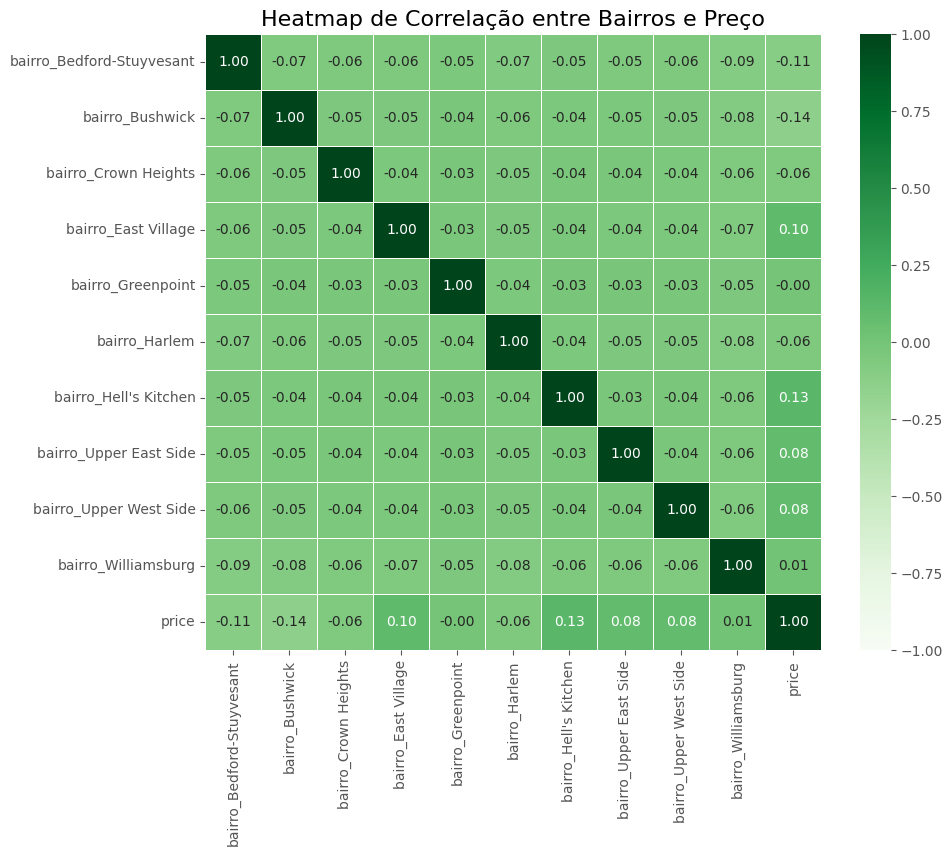

In [58]:
# Plota o heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(
    matriz_correlacao,  
    annot=True,         
    fmt=".2f",          
    cmap="Greens",      
    vmin=-1,           
    vmax=1,             
    linewidths=0.5,     
    square=True         
)

# Adiciona título ao heatmap
plt.title("Heatmap de Correlação entre Bairros e Preço", fontsize=16)

# Exibe o heatmap
plt.show()

Os resultados da correlação e do heatmap acima apresentam os níveis de relação entre a variável categórica bairro e a númerica price do DataFrame. Se nota:

- Todas as correlações foram muito fracas.

**Conclusões principais**
- Os bairros com correlação negativa (Bedford-Stuyvesant, Bushwick, Crown Heights, Harlem) tendem a estar associados a preços mais baixos, com Bushwick sendo o mais forte nessa tendência.
- Os bairros com correlação positiva (East Village, Hell's Kitchen, Upper East Side, Upper West Side) tendem a estar associados a preços mais altos, com Hell's Kitchen sendo o mais forte nessa tendência.
- Greenpoint e Williamsburg têm correlações próximas de zero, indicando que a presença desses bairros não influencia significativamente o preço.

---

##### **1.8.6 - Correlação entre nome e price**

In [59]:
# Faz uma cópia do DF e retira coluna já analisada
df_limpo_copia_4 = df_limpo.copy()

# Aplica encoding na variável categórica 'nome'
df_encoded = pd.get_dummies(df_limpo_copia_4, columns=['nome'], drop_first=True)

# Seleciona colunas de interesse (nomes codificados e price)
colunas_correlacao = [col for col in df_encoded.columns if col.startswith('nome_')] + ['price']
df_correlacao = df_encoded[colunas_correlacao]

# Remove colunas com variância zero (constantes)
colunas_validas = df_correlacao.columns[df_correlacao.std() > 0]
df_correlacao = df_correlacao[colunas_validas]

# Filtra os 10 nomes mais frequentes
top_10_nomes = df_limpo_copia_4['nome'].value_counts().nlargest(10).index
colunas_top_10 = [col for col in df_correlacao.columns if col.startswith('nome_') and col.split('_')[1] in top_10_nomes] + ['price']
df_correlacao_top_10 = df_correlacao[colunas_top_10]

# Cria a matriz de correlação
matriz_correlacao_nome = df_correlacao_top_10.corr()

# Filtra apenas as correlações entre 'price' e as colunas de 'nome'
corr_nome_price = matriz_correlacao_nome['price'].drop('price')

# Exibe as correlações
print("Correlação entre 'nome' e 'price' (Top 10 nomes mais frequentes):")
print(corr_nome_price)

Correlação entre 'nome' e 'price' (Top 10 nomes mais frequentes):
nome_Brooklyn Apartment                -0.006386
nome_Cozy Brooklyn Apartment           -0.004959
nome_Home Away From Home               -0.008979
nome_Home away from home               -0.009832
nome_New york Multi-unit building      -0.005317
nome_Private Room                      -0.009956
nome_Private Room_Brooklyn Townhouse    0.004604
nome_Private room                      -0.009293
nome_Private room in Brooklyn          -0.013826
nome_Private room in Manhattan         -0.011284
nome_Private room in Williamsburg      -0.007122
Name: price, dtype: float64


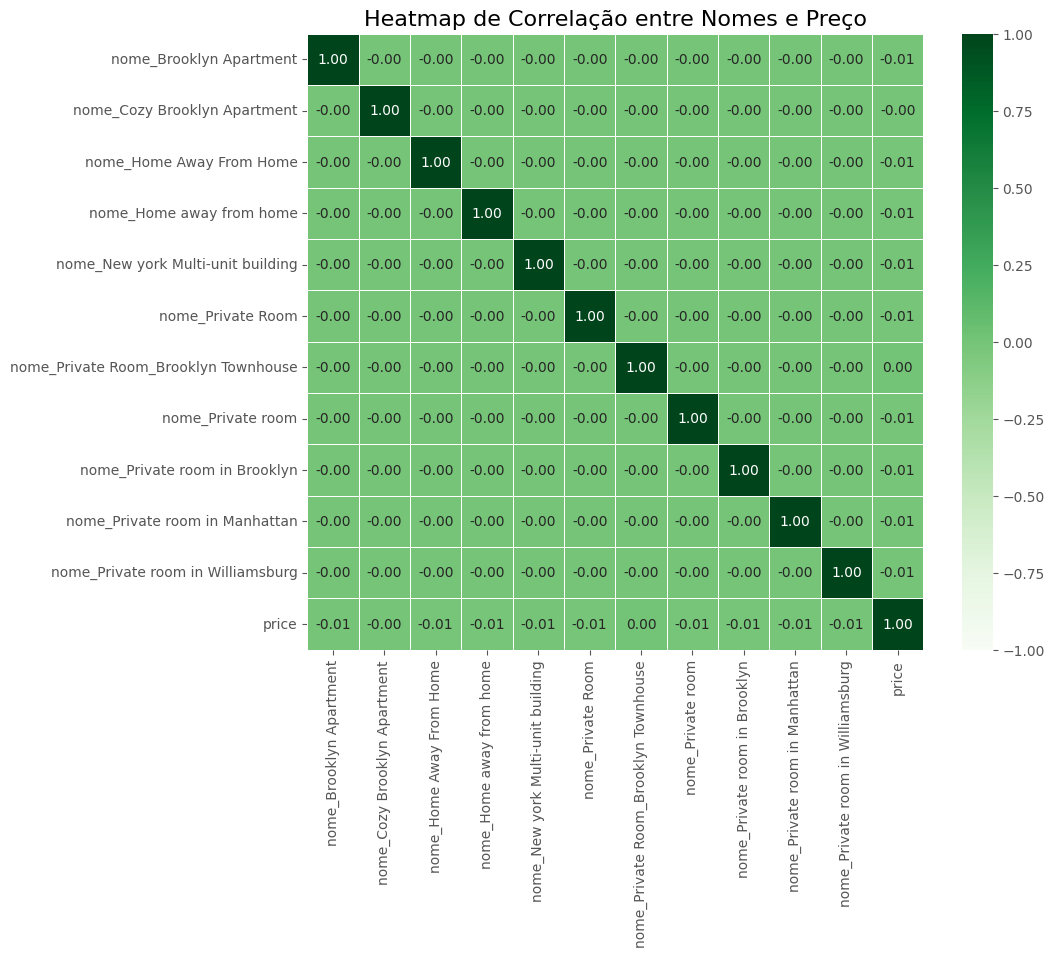

In [60]:
# Plota o heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(
    matriz_correlacao_nome,  
    annot=True,         
    fmt=".2f",          
    cmap="Greens",      
    vmin=-1,           
    vmax=1,             
    linewidths=0.5,     
    square=True         
)

# Adiciona título ao heatmap
plt.title("Heatmap de Correlação entre Nomes e Preço", fontsize=16)

# Exibe o heatmap
plt.show()

Os resultados da correlação e do heatmap acima apresentam os níveis de relação entre a variável categórica nome e a númerica price do DataFrame. Se nota:

- A maioria dos nomes listados tem uma correlação muito próxima de zero, indicando que a presença desses nomes não influencia significativamente o preço dos imóveis.
- Nomes dos imóveis não parecem ter um impacto significativo no preço, já que as correlações são muito próximas de zero. Isso sugere que outros fatores (como localização, tamanho, comodidades, etc.) podem ser mais importantes na determinação do preço dos imóveis.

---
#### **1.9 - Respondendo às perguntas**

---

##### **1.9.1 - Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?**

In [61]:
# Agrupa por bairro e calcula métricas
bairro_analysis = df_limpo.groupby('bairro').agg({
    'price': 'mean',
    'numero_de_reviews': 'sum',
    'disponibilidade_365': 'mean'
}).reset_index()

# Renomeia as colunas para facilitar a interpretação
bairro_analysis.columns = ['bairro', 'preco_medio', 'total_reviews', 'disponibilidade_media']

# Cria um ranking combinando entre preço médio e total de reviews
bairro_analysis['ranking'] = (
    bairro_analysis['preco_medio'].rank(ascending=False) +  # Preço mais alto = melhor
    bairro_analysis['total_reviews'].rank(ascending=False)  # Mais reviews = melhor
)

# Ordena os bairros pelo ranking
bairro_analysis = bairro_analysis.sort_values(by='ranking')

# Exibe os top 10 bairros para investimento
top_bairros = bairro_analysis.head(10)
print(top_bairros)

                bairro  preco_medio  total_reviews  disponibilidade_media  \
206       West Village   194.629707           4603              43.441423   
34             Chelsea   181.656198           5712              51.347107   
126            Midtown   177.655462           5080              67.737815   
94      Hell's Kitchen   168.718354           9540              66.044304   
64        East Village   152.342767          12523              42.478774   
91   Greenwich Village   183.513410           2444              44.528736   
198    Upper East Side   150.601869          10105              53.934579   
199    Upper West Side   148.822165          10097              40.902062   
144             Nolita   174.888199           1798              43.981366   
118    Lower East Side   145.843333           6311              58.011667   

     ranking  
206     23.0  
34      25.0  
126     28.0  
94      28.0  
64      34.0  
91      37.0  
198     39.0  
199     44.0  
144     51.0  
11

In [62]:
# Filtra os bairros com disponibilidade média abaixo de um limite (100 dias)
bairros_alta_demanda = bairro_analysis[bairro_analysis['disponibilidade_media'] < 100]

# Exibe os bairros com alta demanda
print(bairros_alta_demanda.sort_values(by='preco_medio', ascending=False))

                bairro  preco_medio  total_reviews  disponibilidade_media  \
69         Eltingville   299.000000              0              30.000000   
143               NoHo   205.000000            353              48.820513   
206       West Village   194.629707           4603              43.441423   
194            Tribeca   192.682540            480              50.206349   
91   Greenwich Village   183.513410           2444              44.528736   
..                 ...          ...            ...                    ...   
1        Arden Heights    62.000000             28              20.333333   
131        Morris Park    61.666667            171              77.111111   
171      Schuylerville    60.600000            102              97.600000   
140           New Dorp    57.000000              0               0.000000   
65         Eastchester    50.000000              0              88.000000   

     ranking  
69     217.0  
143     99.0  
206     23.0  
194     88.0  


In [63]:
# Exibe os melhores bairros para investimento
melhores_bairros = top_bairros[['bairro', 'preco_medio', 'total_reviews', 'disponibilidade_media']]
print(melhores_bairros)

                bairro  preco_medio  total_reviews  disponibilidade_media
206       West Village   194.629707           4603              43.441423
34             Chelsea   181.656198           5712              51.347107
126            Midtown   177.655462           5080              67.737815
94      Hell's Kitchen   168.718354           9540              66.044304
64        East Village   152.342767          12523              42.478774
91   Greenwich Village   183.513410           2444              44.528736
198    Upper East Side   150.601869          10105              53.934579
199    Upper West Side   148.822165          10097              40.902062
144             Nolita   174.888199           1798              43.981366
118    Lower East Side   145.843333           6311              58.011667


Analisando os resultados acima, os três melhores bairros para compra visando alugar na plataforma são:

- West Village -> Potencial: Alta demanda
    - Tem o preço médio mais alto
    - Tem um número significativo de reviews
    - Tem baixa disponibilidade

- Chelsea -> Potencial: Alta popularidade
    - Tem o segundo preço médio mais alto
    - Tem o maior numero de reviews
    - Tem disponibilidade moderada

- Nolita -> Potencial: Público que paga mais com menos reviews
    - Tem preço médio alto
    - Tem poucos reviews
    - Tem disponibilidade média

---

##### **1.9.2 - O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?**

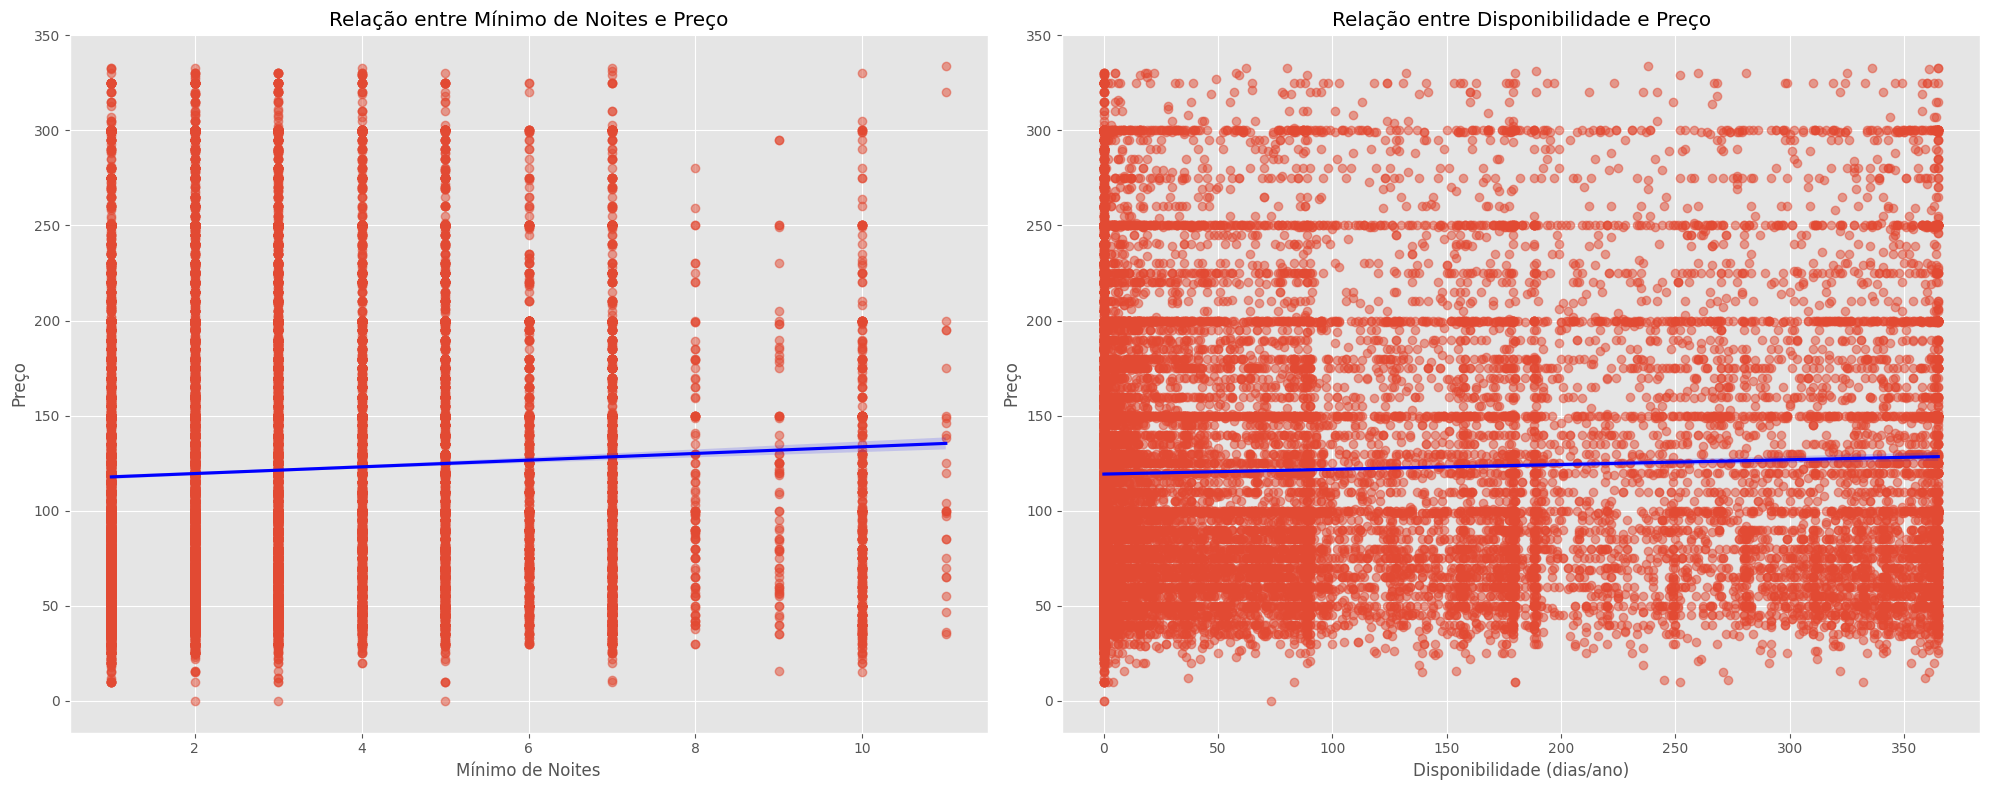

In [64]:
# Cria uma figura dupla
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plota o gráfico para mínimo de noites vs preço
sns.regplot(x='minimo_noites', y='price', data=df_limpo, ax=axes[0], scatter_kws={'alpha':0.5}, line_kws={'color':'blue'})
axes[0].set_title('Relação entre Mínimo de Noites e Preço')
axes[0].set_xlabel('Mínimo de Noites')
axes[0].set_ylabel('Preço')

# Plota o gráfico para disponibilidade vs preço
sns.regplot(x='disponibilidade_365', y='price', data=df_limpo, ax=axes[1], scatter_kws={'alpha':0.5}, line_kws={'color':'blue'})
axes[1].set_title('Relação entre Disponibilidade e Preço')
axes[1].set_xlabel('Disponibilidade (dias/ano)')
axes[1].set_ylabel('Preço')

plt.tight_layout()
plt.show()

Para ambas as variáveis, o preço apresenta alta variabilidade e, visualmente, não há um padrão claro.

Podemos usar testes estatísticos para determinar se há diferença significativa entre as médias de preço e médias de noites / disponibilidade.

---

##### **Mínimo de Noites**

Para o mínimo de noites, vamos separar as faixas em 3:
- Estadia curta (0-3)
- Estadia média (4-7)
- Estadia longa (8-11) 

Compararemos com as respectivas faixas de preço.

Podemos utilizar Kruskal-Wallis. Este teste é uma ótima forma de comparar mais de duas amostras independentes (faixas de minimo_noites e price). Diferente do ANOVA, que exige que as variâncias entre os grupos sejam semelhantes, o Kruskal-Wallis não faz essa suposição. 

Vamos verificar se as variâncias são realmente diferentes com o teste de Levene:

- H0 - As variâncias dos grupos são iguais.
- H1 - As variâncias dos grupos são diferentes.

In [65]:
# Criando faixas para mínimo de noites
df_limpo['faixa_minimo_noites'] = pd.cut(df_limpo['minimo_noites'], bins=[0, 3, 7, 11], labels=['0-3', '4-7', '8-11'])

# Cria uma lista e faz a extração dos valores de price
grupos_minimo_noites = [df_limpo[df_limpo['faixa_minimo_noites'] == faixa]['price'] for faixa in df_limpo['faixa_minimo_noites'].unique()]

# Aplica o teste de Levene para verificar a homogeneidade das variâncias
stat, p = levene(*grupos_minimo_noites)

print(f"Teste de Levene: estatística = {stat}, p-valor = {p}")

Teste de Levene: estatística = 9.725859571132228, p-valor = 5.9905666453550695e-05


P-valor menor que 0,05, rejeita a hipótese nula. Temos variâncias diferentes e, podemos então, utilizar Kruskal.

Para Kruskal afirmamos que:
- H0 - Não há diferença significativa nos preços (price) entre as diferentes faixas de minimo_noites
- H1 - Pelo menos uma das faixas de minimo_noites apresenta uma distribuição de preços significativamente diferente das outras.

In [66]:
# Realiza o teste de Kruskal-Wallis
stat, p = kruskal(*grupos_minimo_noites)
print(f"Teste de Kruskal-Wallis para mínimo de noites: estatística = {stat}, p-valor = {p}")

Teste de Kruskal-Wallis para mínimo de noites: estatística = 74.8738467797102, p-valor = 5.512527288434815e-17


O teste de Kruskal-Wallis indicou uma diferença estatisticamente significativa entre as médias de preços nas faixas de "mínimo de noites". 

**Isso significa que sim, o preço dos aluguéis varia de forma significativa dependendo do número mínimo de noites exigido para a reserva.**

Ainda podemos realizar um teste post hoc, que permite comparar quais as diferenças entre as faixas definidas. 

Podemos utilizar o teste Games-Howell que é ideal para grupos com tamanhos e variâncias diferentes. Vamos só verificar se os grupos são diferentes.

In [67]:
# Verifica os tamanhos de cada grupo
tamanhos_grupos = df_limpo.groupby('faixa_minimo_noites', observed=True).size()
print(tamanhos_grupos)

faixa_minimo_noites
0-3     22240
4-7      7411
8-11      656
dtype: int64


Há uma grande diferença nas amostras, isso indica que podemos utilizar o teste.

In [68]:
# Realiza o teste de Games-Howell para comparações múltiplas
games_howell_result = pg.pairwise_gameshowell(dv='price', between='faixa_minimo_noites', data=df_limpo)

# Exibe os resultados do teste
print(games_howell_result)

     A     B     mean(A)     mean(B)       diff        se         T  \
0  0-3   4-7  119.543795  126.393604  -6.849809  0.911159 -7.517686   
1  0-3  8-11  119.543795  113.457317   6.086478  2.568198  2.369941   
2  4-7  8-11  126.393604  113.457317  12.936287  2.650167  4.881311   

             df      pval    hedges  
0  12484.228048  0.000000 -0.101861  
1    696.854718  0.047392  0.091059  
2    789.518273  0.000004  0.190233  


Essa é a tabela de comparação de Games-Howell. Comparamos as faixas de minimo_noites entre elas e as médias de preço (A e B).

A estatística T indica a força da diferença observada entre os dois grupos.

- A diferença entre os preços das faixas "0-3" e "4-7" é estatisticamente significativa (p < 0.05), e a média de "0-3" é significativamente menor do que a de "4-7" (com uma diferença de -6.85).
- A diferença entre "0-3" e "8-11" também é estatisticamente significativa (p = 0.047), com a média de "0-3" sendo maior (diferença de 6.09).
- A diferença entre "4-7" e "8-11" é altamente significativa (p < 0.0001), com a média de "4-7" sendo maior (diferença de 12.94).

Principais conclusões:
- A faixa "4-7" tem preços significativamente maiores do que "0-3" e "8-11".
- A faixa "0-3" tem preços significativamente mais baixos do que "4-7", mas mais altos do que "8-11".

---
##### **Disponibilidade**

Para calcular a disponiblidade, a variável disponibilidade_365 também pode ser dividida em faixas.

- Muito Baixa: 0 a 30 dias
- Baixa: 31 a 90 dias
- Média Baixa: 91 a 150 dias
- Média Alta: 151 a 210 dias
- Alta: 211 a 270 dias
- Muito Alta: 271 a 365 dias

Também usamos Kruskal-Wallis.

Vamos verificar se as variâncias são realmente diferentes com o teste de Levene:

- H0 - As variâncias dos grupos são iguais.
- Ha - As variâncias dos grupos são diferentes.

In [69]:
# Ajustando a criação das 6 faixas de disponibilidade
df_limpo['faixa_disponibilidade'] = pd.cut(df_limpo['disponibilidade_365'], bins=[-1, 30, 90, 150, 210, 270, 365], labels=['Muito Baixa', 'Baixa', 'Média Baixa', 'Média Alta', 'Alta', 'Muito Alta'])

# Agrupando os preços por faixa de disponibilidade
grupos_disponibilidade = [df_limpo[df_limpo['faixa_disponibilidade'] == faixa]['price'] for faixa in df_limpo['faixa_disponibilidade'].unique()]

# Aplica o teste de Levene para verificar a homogeneidade das variâncias
stat, p = levene(*grupos_disponibilidade)

print(f"Teste de Levene: estatística = {stat}, p-valor = {p}")

Teste de Levene: estatística = 21.9092924094866, p-valor = 5.609715571488669e-22


P-valor menor que 0,05, rejeita a hipótese nula. Temos variâncias diferentes e, podemos então, utilizar Kruskal.3

Afirmamos que:
- H0 - Não há diferença significativa nos preços (price) entre as diferentes faixas de disponibilidade_365
- H1 - Pelo menos uma das faixas de disponibilidade_365 apresenta uma distribuição de preços significativamente diferente das outras.

In [70]:
# Teste de Kruskal-Wallis
stat, p = kruskal(*grupos_disponibilidade)

print(f"Teste de Kruskal-Wallis: estatística = {stat}, p-valor = {p}")

Teste de Kruskal-Wallis: estatística = 79.44723477239665, p-valor = 1.095173458524292e-15


Rejeitamos a hipótese nula. **A diferença entre as faixas de disponibilidade_365 e preço é significativa.**

Podemos utilizar o teste Games-Howell novamente. Vamos só verificar se os grupos são diferentes.

In [71]:
# Verifica os tamanhos de cada grupo
tamanhos_grupos = df_limpo.groupby('faixa_disponibilidade', observed=True).size()
print(tamanhos_grupos)

faixa_disponibilidade
Muito Baixa    18738
Baixa           3739
Média Baixa     1388
Média Alta      1938
Alta            1013
Muito Alta      3491
dtype: int64


Podemos realizar o teste. Prosseguindo.

In [72]:
# Realiza o teste de Games-Howell para comparações múltiplas
games_howell_result = pg.pairwise_gameshowell(dv='price', between='faixa_disponibilidade', data=df_limpo)

# Exibe os resultados do teste
print(games_howell_result)

              A            B     mean(A)     mean(B)       diff        se  \
0   Muito Baixa        Baixa  118.632405  121.232950  -2.600545  1.209497   
1   Muito Baixa  Média Baixa  118.632405  128.036744  -9.404339  1.968633   
2   Muito Baixa   Média Alta  118.632405  127.710526  -9.078122  1.697858   
3   Muito Baixa         Alta  118.632405  136.347483 -17.715078  2.330435   
4   Muito Baixa   Muito Alta  118.632405  123.237754  -4.605349  1.313393   
5         Baixa  Média Baixa  121.232950  128.036744  -6.803794  2.211418   
6         Baixa   Média Alta  121.232950  127.710526  -6.477576  1.974228   
7         Baixa         Alta  121.232950  136.347483 -15.114533  2.538854   
8         Baixa   Muito Alta  121.232950  123.237754  -2.004804  1.655251   
9   Média Baixa   Média Alta  128.036744  127.710526   0.326217  2.512012   
10  Média Baixa         Alta  128.036744  136.347483  -8.310739  2.976309   
11  Média Baixa   Muito Alta  128.036744  123.237754   4.798989  2.269909   

Notamos que:

- Há diferenças significativas em várias comparações de faixas, como entre "Muito Baixa" e outras faixas, "Baixa" e "Média Baixa", e outras comparações.
- Algumas comparações não mostram diferenças significativas (como entre "Muito Baixa" e "Baixa", ou entre "Média Baixa" e "Média Alta").

Principais conclusões:
- Imóveis com menor disponibilidade de dias no ano (como "Muito Baixa") tendem a ser mais baratos.
- Nem todas as comparações de faixas mostram diferenças significativas, o que indica que a disponibilidade tem um efeito mais relevante em alguns casos do que em outros.

---

##### **1.9.3 - Existe algum padrão no texto do nome do local para lugares de mais alto valor?**

In [73]:
# Ordenando o DataFrame por preço em ordem decrescente
df_limpo = df_limpo.sort_values(by='price', ascending=False)

# Exibindo os 10 imóveis mais caros (ajuste o número conforme necessário)
print(df_limpo[['nome', 'price']].head(25))

                                                    nome  price
2157                 1BR Apt as featured in New York Mag    334
19640  SOMMwhere in NYC/ a unique, conscious artists ...    333
45302                  Five-star luxury Apt in Chelsea !    333
38564              Parisian Palace in Heart of Manhattan    333
48566   Your Private Duplex Mansion in the HEART of NYC!    333
13797                       Mid-Century Museum Sleepover    333
46438                      CHELSEA CENTRAL LUXURY 2BATHS    332
1355                 Greenwich Village Skylit 1BR +deck!    331
1565                 Sunny, Large & Lovely in Greenpoint    330
46558                   Luxury 2 BR Home in Hudson Yards    330
48460                    ❤️Ever best located cozy flat❤️    330
31947                   Private rooftop Penthouse heaven    330
29144          Best view of the Empire State in all NYC!    330
11030        Location!  Large 1 bedroom oasis w elevator    330
26242                                Upp

Sem aprofundar em nada estatístico ou de modelagem, podemos observar que:
- Uso de palavras de alto impacto: Termos como "luxuoso", "exclusivo", "palácio", "mansão", "penthouse", "espetacular", "privilégio" e "exclusivo" são frequentemente utilizados para destacar a qualidade e o status do imóvel.
- Há menção de bairros prestigiados, isso pode atrair compradores interessados em morar em áreas de alto padrão.
- Destaque para características únicas: "vista deslumbrante", "terraço privativo", "jardim", "lareira", "piscina" e "academia", pode aumentar o interesse e justificar um preço mais alto.
- Empregar palavras como "melhor", "mais bonito", "mais luxuoso" e "único" enfatiza a exclusividade e o alto valor do imóvel.

**A descrição dos imóveis é predominantemente textual, o que dificulta a análise quantitativa direta.** 

**Seria necessário aplicar técnicas de processamento de linguagem natural (NLP) para extrair informações relevantes e quantificáveis.**

---

##### **1.9.4 - Imóveis com mais reviews têm preços mais altos?**

Sim, como visto na análise univariada, existe forte evidência de que há uma associação significativa entre o número de reviews e o preço. 

No entanto, essa relação não é necessariamente linear e pode ser influenciada por outros fatores.

---

##### **1.9.5 - Imóveis com alta disponibilidade têm preços mais baixos?**

Sim, a análise univariada mostra que a maioria dos imóveis com preços baixos estão na categoria de alta disponibilidade. 

Isso sugere que os proprietários de imóveis com alta disponibilidade podem estar dispostos a cobrar preços mais baixos para atrair inquilinos.

**Há evidências suficientes para afirmar que existe uma relação significativa entre a faixa de disponibilidade e a faixa de preço dos imóveis**

---

#### **2 - Resultados**

---

##### **2.1 - Distribuição dos Dados e Medidas Estatísticas**

- A EDA revela que a maioria dos preços dos imóveis listados na plataforma se concentra na faixa de 50 a 150, o que sugere que a maior parte das propriedades atende a uma demanda por acomodações mais baratas. No entanto, há uma assimetria positiva na distribuição dos preços, com valores elevados em alguns anúncios que impactam a média.

- Outras variáveis numéricas, como numero_de_reviews e reviews_por_mes, apresentaram distribuições assimétricas à direita. Isso reflete que a maioria das propriedades tem poucas avaliações, enquanto uma minoria recebe muitos reviews.

- A variável minimo_noites destacou uma média de 2,87 noites, com um desvio padrão relativamente baixo, indicando que estadias curtas são comuns. Entretanto, imóveis que exigem estadias mais longas podem ter menor atratividade, o que pode impactar o número de reviews mensais.

---

##### **2.2 - Correlações entre Variáveis**

As análises de correlação apontaram algumas relações interessantes entre variáveis numéricas e categóricas:

- Imóveis do tipo "Entire home/apt" estão associados a preços significativamente mais altos, enquanto "Private room" está ligado a preços mais baixos.

- Os bairros também exercem influência no preço. Manhattan, por exemplo, apresentou correlação moderada com preços mais elevados, enquanto outros bairros, como Bronx e Staten Island, praticamente não influenciam os valores.

---

##### **2.3 - Insights sobre Localização e Tipo de Imóvel**

Os bairros desempenham um papel fundamental na precificação. Analisando as características dos anúncios, três bairros se destacaram como os melhores para investimento:

- West Village: Alta demanda e preço médio elevado, mas com baixa disponibilidade.

- Chelsea: Popularidade significativa, refletida pelo maior número de reviews e preços competitivos.

- Nolita: Público disposto a pagar mais, mesmo com menor volume de avaliações.

Além disso, anúncios que destacam características como luxo, exclusividade e localização em bairros prestigiados tendem a justificar preços mais altos.

---

##### **2.4 - Respostas às Perguntas de Pesquisa**

1 - Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?
- West Village, Chelsea e Nolita se destacam como os bairros com maior potencial de retorno devido à alta demanda e preços médios elevados.

2 - O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?
- Sim, os cálculos mostraram que os preços variam de forma significativa dependendo do número mínimo de noites ou da disponibilidade do imóvel.

3 - Existe algum padrão no texto do nome do local para lugares de mais alto valor??
- Sem aprofundar em nada estatístico ou de modelagem, podemos observar que:
    - Uso de palavras de alto impacto: Termos como "luxuoso", "exclusivo", "palácio", "mansão", "penthouse", "espetacular", "privilégio" e "exclusivo" são frequentemente utilizados para destacar a qualidade e o status do imóvel.
    - Há menção de bairros prestigiados, isso pode atrair compradores interessados em morar em áreas de alto padrão.
    - Destaque para características únicas: "vista deslumbrante", "terraço privativo", "jardim", "lareira", "piscina" e "academia", pode aumentar o interesse e justificar um preço mais alto.
    - Empregar palavras como "melhor", "mais bonito", "mais luxuoso" e "único" enfatiza a exclusividade e o alto valor do imóvel.

4 - Imóveis com mais reviews têm preços mais altos?
- Não necessariamente. Apesar de um número maior de avaliações estar levemente associado a preços mais altos, o impacto é pequeno. Outros fatores, como localização e tipo de imóvel, são mais determinantes.

5 - Imóveis com alta disponibilidade têm preços mais baixos?
- Sim, há uma relação fraca entre maior disponibilidade (disponibilidade_365) e preços mais baixos, sugerindo que imóveis com maior número de dias disponíveis podem ser mais baratos.

---

#### 3 - Conclusões

Várias variáveis tem com o preço, indicando que podem ser úteis como preditores no modelo:
- room_type: Fortemente associado ao preço:
    - "Entire home/apt" tem correlação positiva (0.61) com preços mais altos.
    - "Private room" tem correlação negativa (-0.58) com preços mais baixos.

- neighbourhood_group:
    - "Manhattan" tem uma correlação positiva moderada (0.3), indicando preços mais altos.
    - Outros bairros como "Brooklyn" e "Queens" têm leve correlação negativa.

- minimum_nights:
    - Apresenta correlação com o preço
    - A faixa "4-7" noites tem preços significativamente maiores do que "0-3" e "8-11" noites.
    - A faixa "0-3" noites tem preços significativamente mais baixos do que "4-7" noites, mas mais altos do que "8-11" noites.

- numero_de_reviews:
    - Há forte evidência de que há uma associação significativa entre o número de reviews e o preço.
    - A maioria das propriedades possui um número relativamente baixo de avaliações, com um pico nas primeiras faixas.

- reviews_por_mes:
    - Há forte evidência de que há uma associação significativa entre o número de reviews e o preço.
    - A maioria das propriedades recebe um número relativamente baixo de reviews por mês.

- disponibilidade_365:
    - Apresenta correlação com o preço
    - Imóveis com menor disponibilidade de dias no ano (como "Muito Baixa") tendem a ser mais baratos.
    - Nem todas as comparações de faixas mostram diferenças significativas, o que indica que a disponibilidade tem um efeito mais relevante em alguns casos do que em outros.

